In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
my_directory = '/content/drive/MyDrive/Crop Yeild prediction using Deep Neural Networks/'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load datasets
faostat_data = pd.read_csv(my_directory + 'FAOSTAT_data_en_1-8-2025 all countries.csv')
value_of_production = pd.read_csv(my_directory + 'Value_of_Production_E_All_Data all.csv', encoding='ISO-8859-1')




In [ ]:
faostat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173451 entries, 0 to 173450
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Domain Code       173451 non-null  object
 1   Domain            173451 non-null  object
 2   Area Code (M49)   173451 non-null  int64 
 3   Area              173451 non-null  object
 4   Element Code      173451 non-null  int64 
 5   Element           173451 non-null  object
 6   Item Code         173451 non-null  object
 7   Item              173451 non-null  object
 8   Year Code         173451 non-null  int64 
 9   Year              173451 non-null  object
 10  Unit              169181 non-null  object
 11  Value             143808 non-null  object
 12  Flag              173451 non-null  object
 13  Flag Description  173451 non-null  object
 14  Note              12813 non-null   object
dtypes: int64(3), object(12)
memory usage: 19.9+ MB


In [ ]:
value_of_production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47563 entries, 0 to 47562
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ï»¿Domain Code    47563 non-null  object
 1   Domain            47563 non-null  object
 2   Area Code (M49)   47563 non-null  int64 
 3   Area              47563 non-null  object
 4   Element Code      47563 non-null  int64 
 5   Element           47563 non-null  object
 6   Item Code (CPC)   47563 non-null  object
 7   Item              47563 non-null  object
 8   Year Code         47563 non-null  int64 
 9   Year              47563 non-null  int64 
 10  Unit              47563 non-null  object
 11  Value             47563 non-null  int64 
 12  Flag              47563 non-null  object
 13  Flag Description  47563 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.1+ MB


In [ ]:

faostat_data.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20002002,2000-2002,%,87,E,Estimated value,NaN
1,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20012003,2001-2003,%,88,E,Estimated value,NaN
2,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20022004,2002-2004,%,91,E,Estimated value,NaN
3,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20032005,2003-2005,%,92,E,Estimated value,NaN
4,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20042006,2004-2006,%,93,E,Estimated value,NaN


In [ ]:
value_of_production.head()

,ï»¿Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QV,Value of Agricultural Production,8,Albania,57,Gross Production Value (current thousand US$),F2051,Agriculture,2000,2000,1000 USD,894034,E,Estimated value
1,QV,Value of Agricultural Production,8,Albania,57,Gross Production Value (current thousand US$),F2051,Agriculture,2001,2001,1000 USD,920755,E,Estimated value
2,QV,Value of Agricultural Production,8,Albania,57,Gross Production Value (current thousand US$),F2051,Agriculture,2002,2002,1000 USD,984638,E,Estimated value
3,QV,Value of Agricultural Production,8,Albania,57,Gross Production Value (current thousand US$),F2051,Agriculture,2003,2003,1000 USD,1212300,E,Estimated value
4,QV,Value of Agricultural Production,8,Albania,57,Gross Production Value (current thousand US$),F2051,Agriculture,2004,2004,1000 USD,1477628,E,Estimated value


In [ ]:
faostat_data['Year'] = faostat_data['Year'].apply(lambda x: int(x.split('-')[0]) - 1)

# Rename columns in FAOSTAT dataset with the prefix 'Food_security'
faostat_renamed = faostat_data.rename(columns={
    'Value': 'Food_security_Value',
    'Unit': 'Food_security_Unit',
    'Element': 'Food_security_Element',
    'Item': 'Food_security_Item'
})

# Rename columns in Production dataset for clarity
production_renamed = value_of_production.rename(columns={
    'Value': 'Production_Value',
    'Unit': 'Production_Unit',
    'Element': 'Production_Element',
    'Item': 'Production_Item'
})


merged_data = pd.merge(
    faostat_renamed,
    production_renamed,
    on=['Area', 'Year'],
    how='inner'
)


merged_data.to_csv('merged_faostat_production.csv', index=False)


print(merged_data.head())


  Domain Code                           Domain_x  Area Code (M49)_x     Area  \
0          FS  Suite of Food Security Indicators                  8  Albania   
1          FS  Suite of Food Security Indicators                  8  Albania   
2          FS  Suite of Food Security Indicators                  8  Albania   
3          FS  Suite of Food Security Indicators                  8  Albania   
4          FS  Suite of Food Security Indicators                  8  Albania   

   Element Code_x Food_security_Element Item Code  \
0            6121                 Value     21010   
1            6121                 Value     21010   
2            6121                 Value     21010   
3            6121                 Value     21010   
4            6121                 Value     21010   

                                  Food_security_Item  Year Code_x  Year  ...  \
0  Average dietary energy supply adequacy (percen...     20012003  2000  ...   
1  Average dietary energy supply adequac

In [ ]:
merged_data['Production_Item'].unique()

array(['Agriculture', 'Cereals, primary', 'Crops', 'Fibre Crops Primary',
       'Food', 'Fruit Primary', 'Livestock', 'Meat indigenous, total',
       'Milk, Total', 'Non Food', 'Oilcrops Primary',
       'Roots and Tubers, Total', 'Sugar Crops Primary',
       'Vegetables and Fruit Primary', 'Vegetables Primary'], dtype=object)

In [ ]:
merged_data['Food_security_Value'].unique()

array(['121', '120', '119', ..., '3611.8', '3716.9', '3413'], dtype=object)

In [ ]:
merged_data['Food_security_Item'].unique()

array(['Average dietary energy supply adequacy (percent) (3-year average)',
       'Dietary energy supply used in the estimation of prevalence of undernourishment (kcal/cap/day)',
       'Dietary energy supply used in the estimation of prevalence of undernourishment (kcal/cap/day) (3-year average)',
       'Share of dietary energy supply derived from cereals, roots and tubers (percent) (3-year average)',
       'Average protein supply (g/cap/day) (3-year average)',
       'Average supply of protein of animal origin (g/cap/day) (3-year average)',
       'Rail lines density (total route in km per 100 square km of land area)',
       'Gross domestic product per capita, PPP, (constant 2017 international $)',
       'Prevalence of undernourishment (percent) (3-year average)',
       'Number of people undernourished (million) (3-year average)',
       'Prevalence of severe food insecurity in the total population (percent) (3-year average)',
       'Prevalence of severe food insecurity in the

In [ ]:
file_path = 'merged_faostat_production.csv'
merged_dataset = pd.read_csv(file_path, low_memory=False)


if 'Production_Value' in merged_dataset.columns:
    merged_dataset['Production_Value'] = pd.to_numeric(merged_dataset['Production_Value'], errors='coerce')

if 'Food_security_Value' in merged_dataset.columns:
    merged_dataset['Food_security_Value'] = pd.to_numeric(merged_dataset['Food_security_Value'], errors='coerce')

# Pivot for `Production_Item`
if 'Production_Item' in merged_dataset.columns and 'Production_Value' in merged_dataset.columns:
    pivoted_production = merged_dataset.pivot_table(
        index=['Year', 'Area'],  # Grouping by 'Year' and 'Area'
        columns='Production_Item',  # Creating separate columns for each unique `Production_Item`
        values='Production_Value',  # Values to fill in the pivot table
        aggfunc='sum'  # Summing in case of duplicates
    ).reset_index()
    pivoted_production.columns.name = None  # Remove column grouping names
else:
    print("The necessary columns 'Production_Item' and 'Production_Value' are not present in the dataset.")
    pivoted_production = None

# Pivot for `Food_security_Item`
if 'Food_security_Item' in merged_dataset.columns and 'Food_security_Value' in merged_dataset.columns:
    pivoted_food_security = merged_dataset.pivot_table(
        index=['Year', 'Area'],  # Grouping by 'Year' and 'Area'
        columns='Food_security_Item',  # Creating separate columns for each unique `Food_security_Item`
        values='Food_security_Value',  # Values to fill in the pivot table
        aggfunc='sum'  # Summing in case of duplicates
    ).reset_index()
    pivoted_food_security.columns.name = None  # Remove column grouping names
else:
    print("The necessary columns 'Food_security_Item' and 'Food_security_Value' are not present in the dataset.")
    pivoted_food_security = None

# Combine the two pivoted datasets
if pivoted_production is not None and pivoted_food_security is not None:
    combined_data = pd.merge(
        pivoted_production, pivoted_food_security, on=['Year', 'Area'], how='outer'
    )
    combined_data.to_csv('combined_pivoted_data.csv', index=False)
    print("Combined data has been saved to 'combined_pivoted_data.csv'.")
else:
    print("One or both pivot operations failed. Combined data could not be created.")


Combined data has been saved to 'combined_pivoted_data.csv'.


In [ ]:
print(combined_data.columns.tolist())


['Year', 'Area', 'Agriculture', 'Cereals, primary', 'Crops', 'Fibre Crops Primary', 'Food', 'Fruit Primary', 'Livestock', 'Meat indigenous, total', 'Milk, Total', 'Non Food', 'Oilcrops Primary', 'Roots and Tubers, Total', 'Sugar Crops Primary', 'Vegetables Primary', 'Vegetables and Fruit Primary', 'Average dietary energy requirement (kcal/cap/day)', 'Average dietary energy supply adequacy (percent) (3-year average)', 'Average fat supply (g/cap/day) (3-year average)', 'Average protein supply (g/cap/day) (3-year average)', 'Average supply of protein of animal origin (g/cap/day) (3-year average)', 'Cereal import dependency ratio (percent) (3-year average)', 'Coefficient of variation of habitual caloric consumption distribution (real number)', 'Dietary energy supply used in the estimation of prevalence of undernourishment (kcal/cap/day)', 'Dietary energy supply used in the estimation of prevalence of undernourishment (kcal/cap/day) (3-year average)', 'Gross domestic product per capita, PPP

In [ ]:
file_path = 'combined_pivoted_data.csv'
combined_data = pd.read_csv(file_path)


production_columns = [
    'Cereals, primary', 'Roots and Tubers, Total', 'Vegetables and Fruit Primary',
    'Sugar Crops Primary', 'Fibre Crops Primary', 'Oilcrops Primary', 'Agriculture', 'Crops',
]


food_security_columns = [
    'Percent of arable land equipped for irrigation (percent) (3-year average)',
    'Gross domestic product per capita, PPP, (constant 2017 international $)',
    'Political stability and absence of violence/terrorism (index)',
    'Average dietary energy supply adequacy (percent) (3-year average)',
    'Dietary energy supply used in the estimation of prevalence of undernourishment (kcal/cap/day)',
    'Average protein supply (g/cap/day) (3-year average)'
]


selected_columns = ['Year', 'Area'] + production_columns + food_security_columns

filtered_data = combined_data[selected_columns]

filtered_data.to_csv('filtered_combined_data.csv', index=False)

print(filtered_data.head())


   Year                 Area  Cereals, primary  Roots and Tubers, Total  \
0  2000              Albania         4035816.0                1230120.0   
1  2000              Algeria         7755876.0                9309168.0   
2  2000  Antigua and Barbuda            1161.0                      NaN   
3  2000            Argentina       119749258.0               14109320.0   
4  2000              Armenia         1241388.0                1363104.0   

   Vegetables and Fruit Primary  Sugar Crops Primary  Fibre Crops Primary  \
0                     6088896.0              48384.0               4788.0   
1                    46994328.0                  NaN                684.0   
2                       70362.0                  NaN                  NaN   
3                    86280440.0           14396008.0            1452820.0   
4                     2861640.0               1188.0                  NaN   

   Oilcrops Primary  Agriculture        Crops  \
0          499824.0   32185224.0   13

In [ ]:

from sklearn.preprocessing import StandardScaler


file_path = 'filtered_combined_data.csv'
data = pd.read_csv(file_path)

columns_with_nan = [
    'Cereals, primary', 'Roots and Tubers, Total', 'Vegetables and Fruit Primary',
    'Sugar Crops Primary', 'Fibre Crops Primary', 'Oilcrops Primary', 'Agriculture','Crops',
    'Percent of arable land equipped for irrigation (percent) (3-year average)',
    'Gross domestic product per capita, PPP, (constant 2017 international $)',
    'Political stability and absence of violence/terrorism (index)',
    'Average dietary energy supply adequacy (percent) (3-year average)',
    'Dietary energy supply used in the estimation of prevalence of undernourishment (kcal/cap/day)',
    'Average protein supply (g/cap/day) (3-year average)'
]

for column in columns_with_nan:
    data[column] = data.groupby('Area')[column].transform(lambda x: x.fillna(x.median()))

for column in columns_with_nan:
    data[column] = data[column].fillna(data[column].median())

missing_values = data[columns_with_nan].isnull().sum()
print("Remaining Missing Values After Grouped Imputation:\n", missing_values)

numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

data.to_csv('cleaned_data.csv', index=False)
print("Data cleaning completed and saved as 'cleaned_data.csv'.")


Remaining Missing Values After Grouped Imputation:
 Cereals, primary                                                                                 0
Roots and Tubers, Total                                                                          0
Vegetables and Fruit Primary                                                                     0
Sugar Crops Primary                                                                              0
Fibre Crops Primary                                                                              0
Oilcrops Primary                                                                                 0
Agriculture                                                                                      0
Crops                                                                                            0
Percent of arable land equipped for irrigation (percent) (3-year average)                        0
Gross domestic product per capita, PPP, (constant 2017 in

Summary Statistics:
                Year  Cereals, primary  Roots and Tubers, Total  \
count  3.448000e+03      3.448000e+03             3.448000e+03   
mean   9.627772e-15      2.885034e-17             1.236443e-17   
std    1.000145e+00      1.000145e+00             1.000145e+00   
min   -1.711515e+00     -2.236956e-01            -2.474454e-01   
25%   -8.032963e-01     -2.182702e-01            -2.408830e-01   
50%   -4.644701e-02     -2.021430e-01            -2.169396e-01   
75%    8.617721e-01     -1.439811e-01            -1.135061e-01   
max    1.618621e+00      1.347681e+01             1.560418e+01   

       Vegetables and Fruit Primary  Sugar Crops Primary  Fibre Crops Primary  \
count                  3.448000e+03         3.448000e+03         3.448000e+03   
mean                   2.885034e-17         3.297182e-17         5.151847e-17   
std                    1.000145e+00         1.000145e+00         1.000145e+00   
min                   -1.749444e-01        -1.885437e-01    

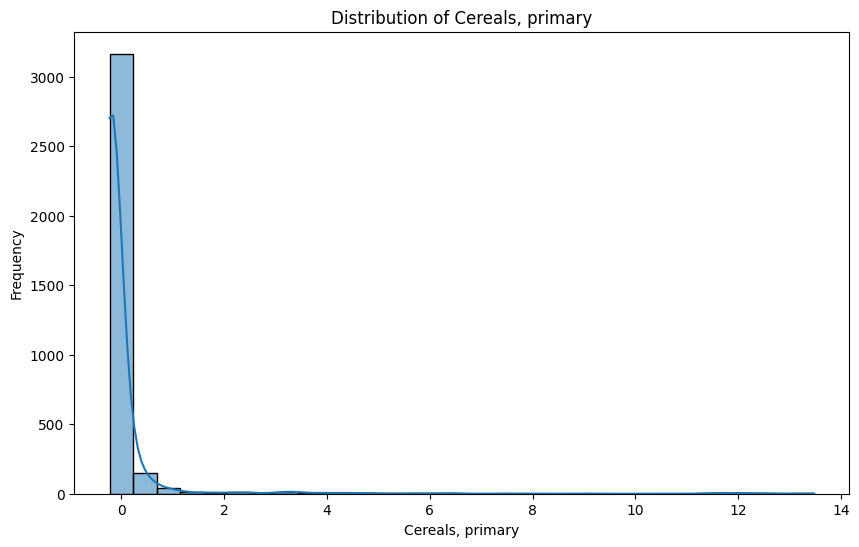

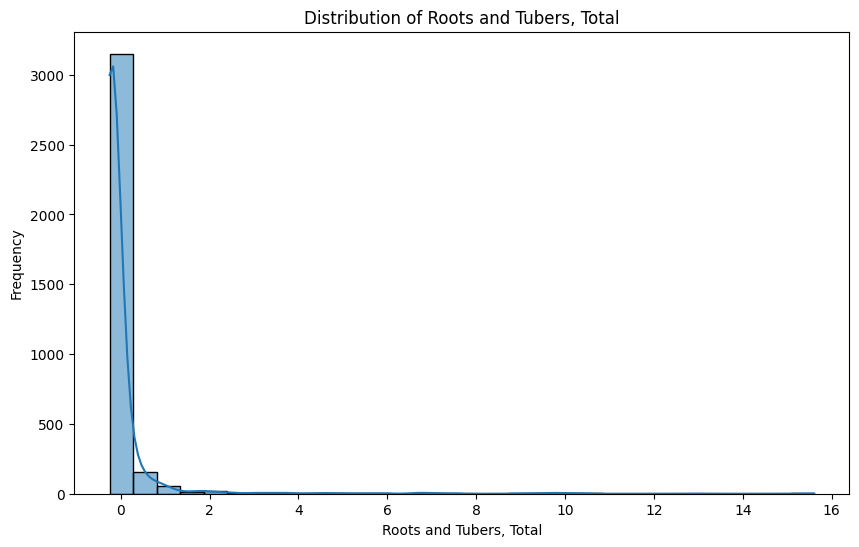

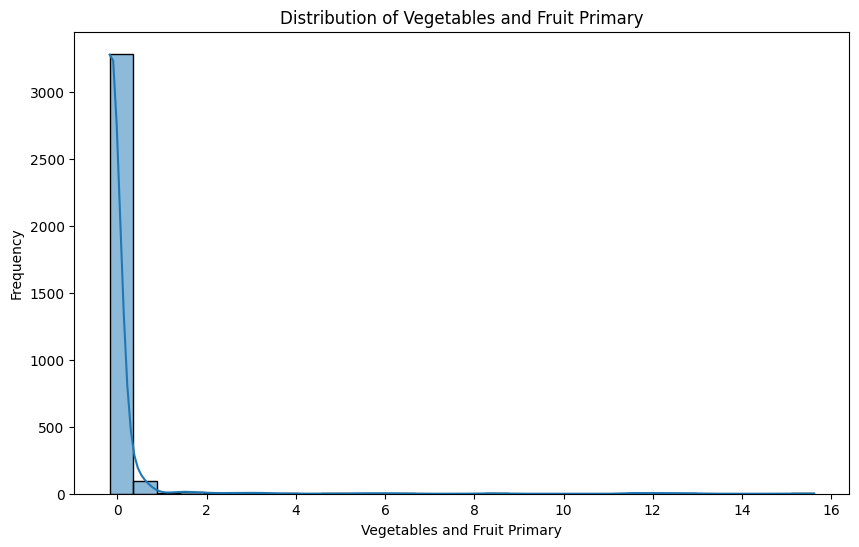

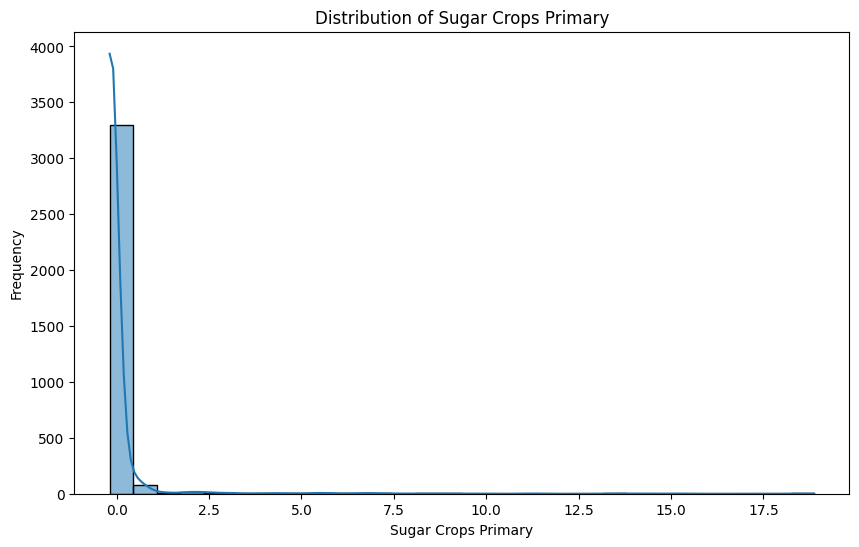

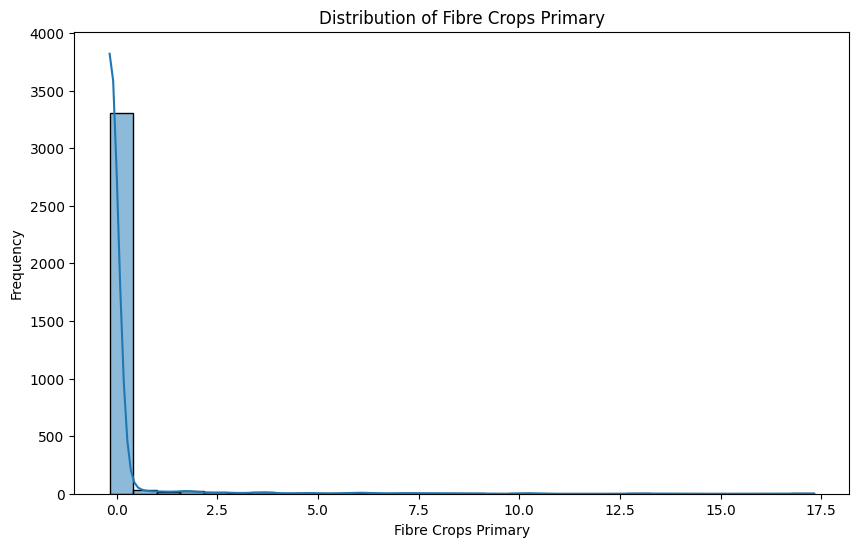

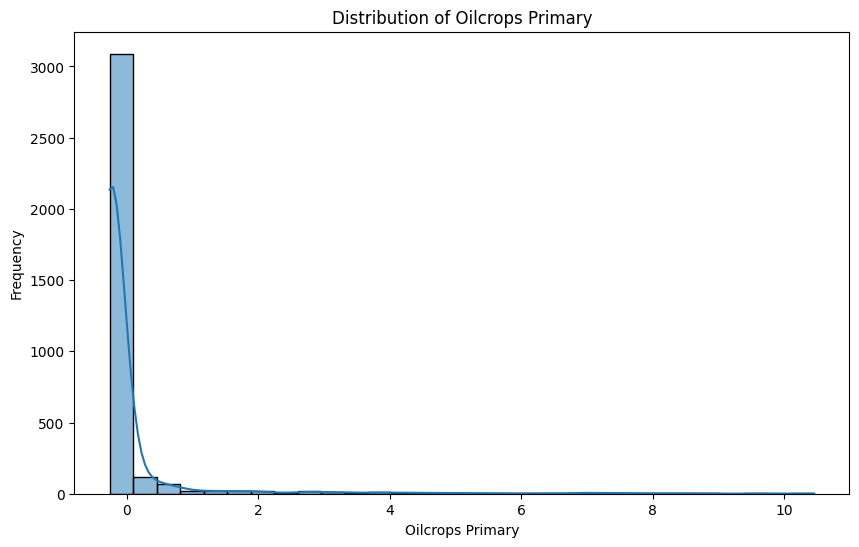

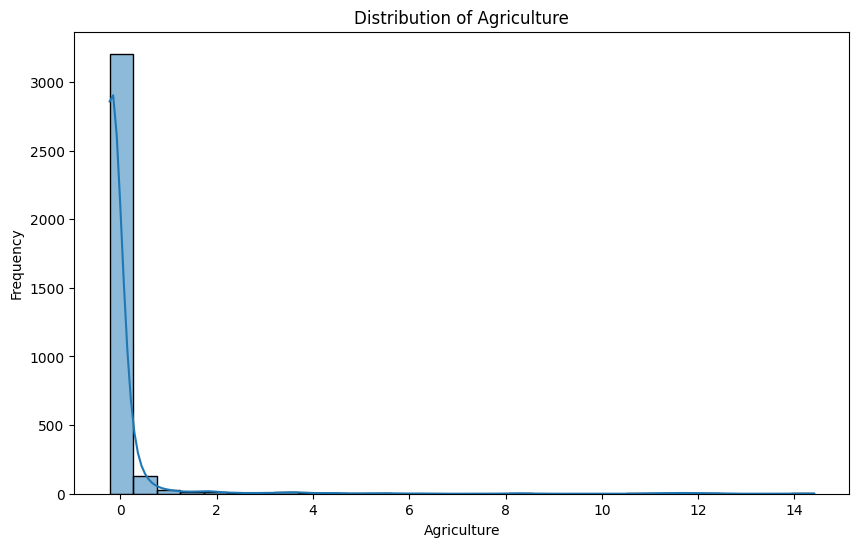

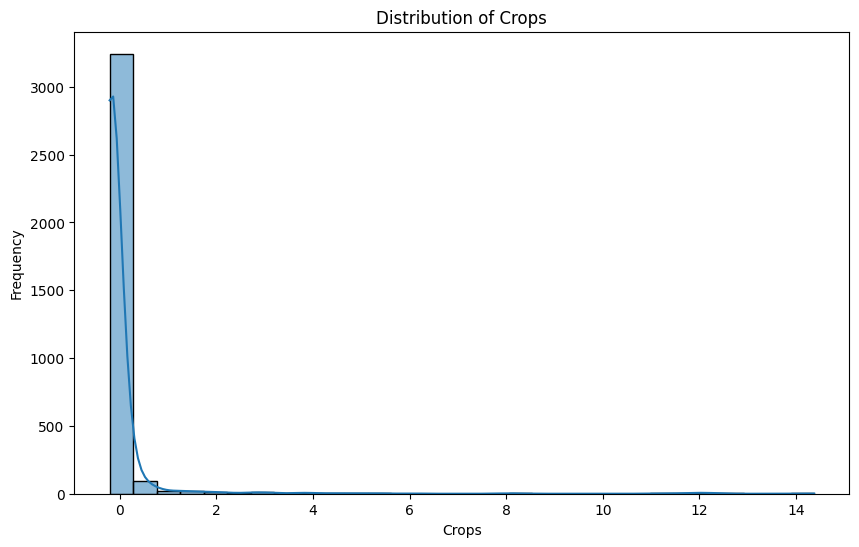

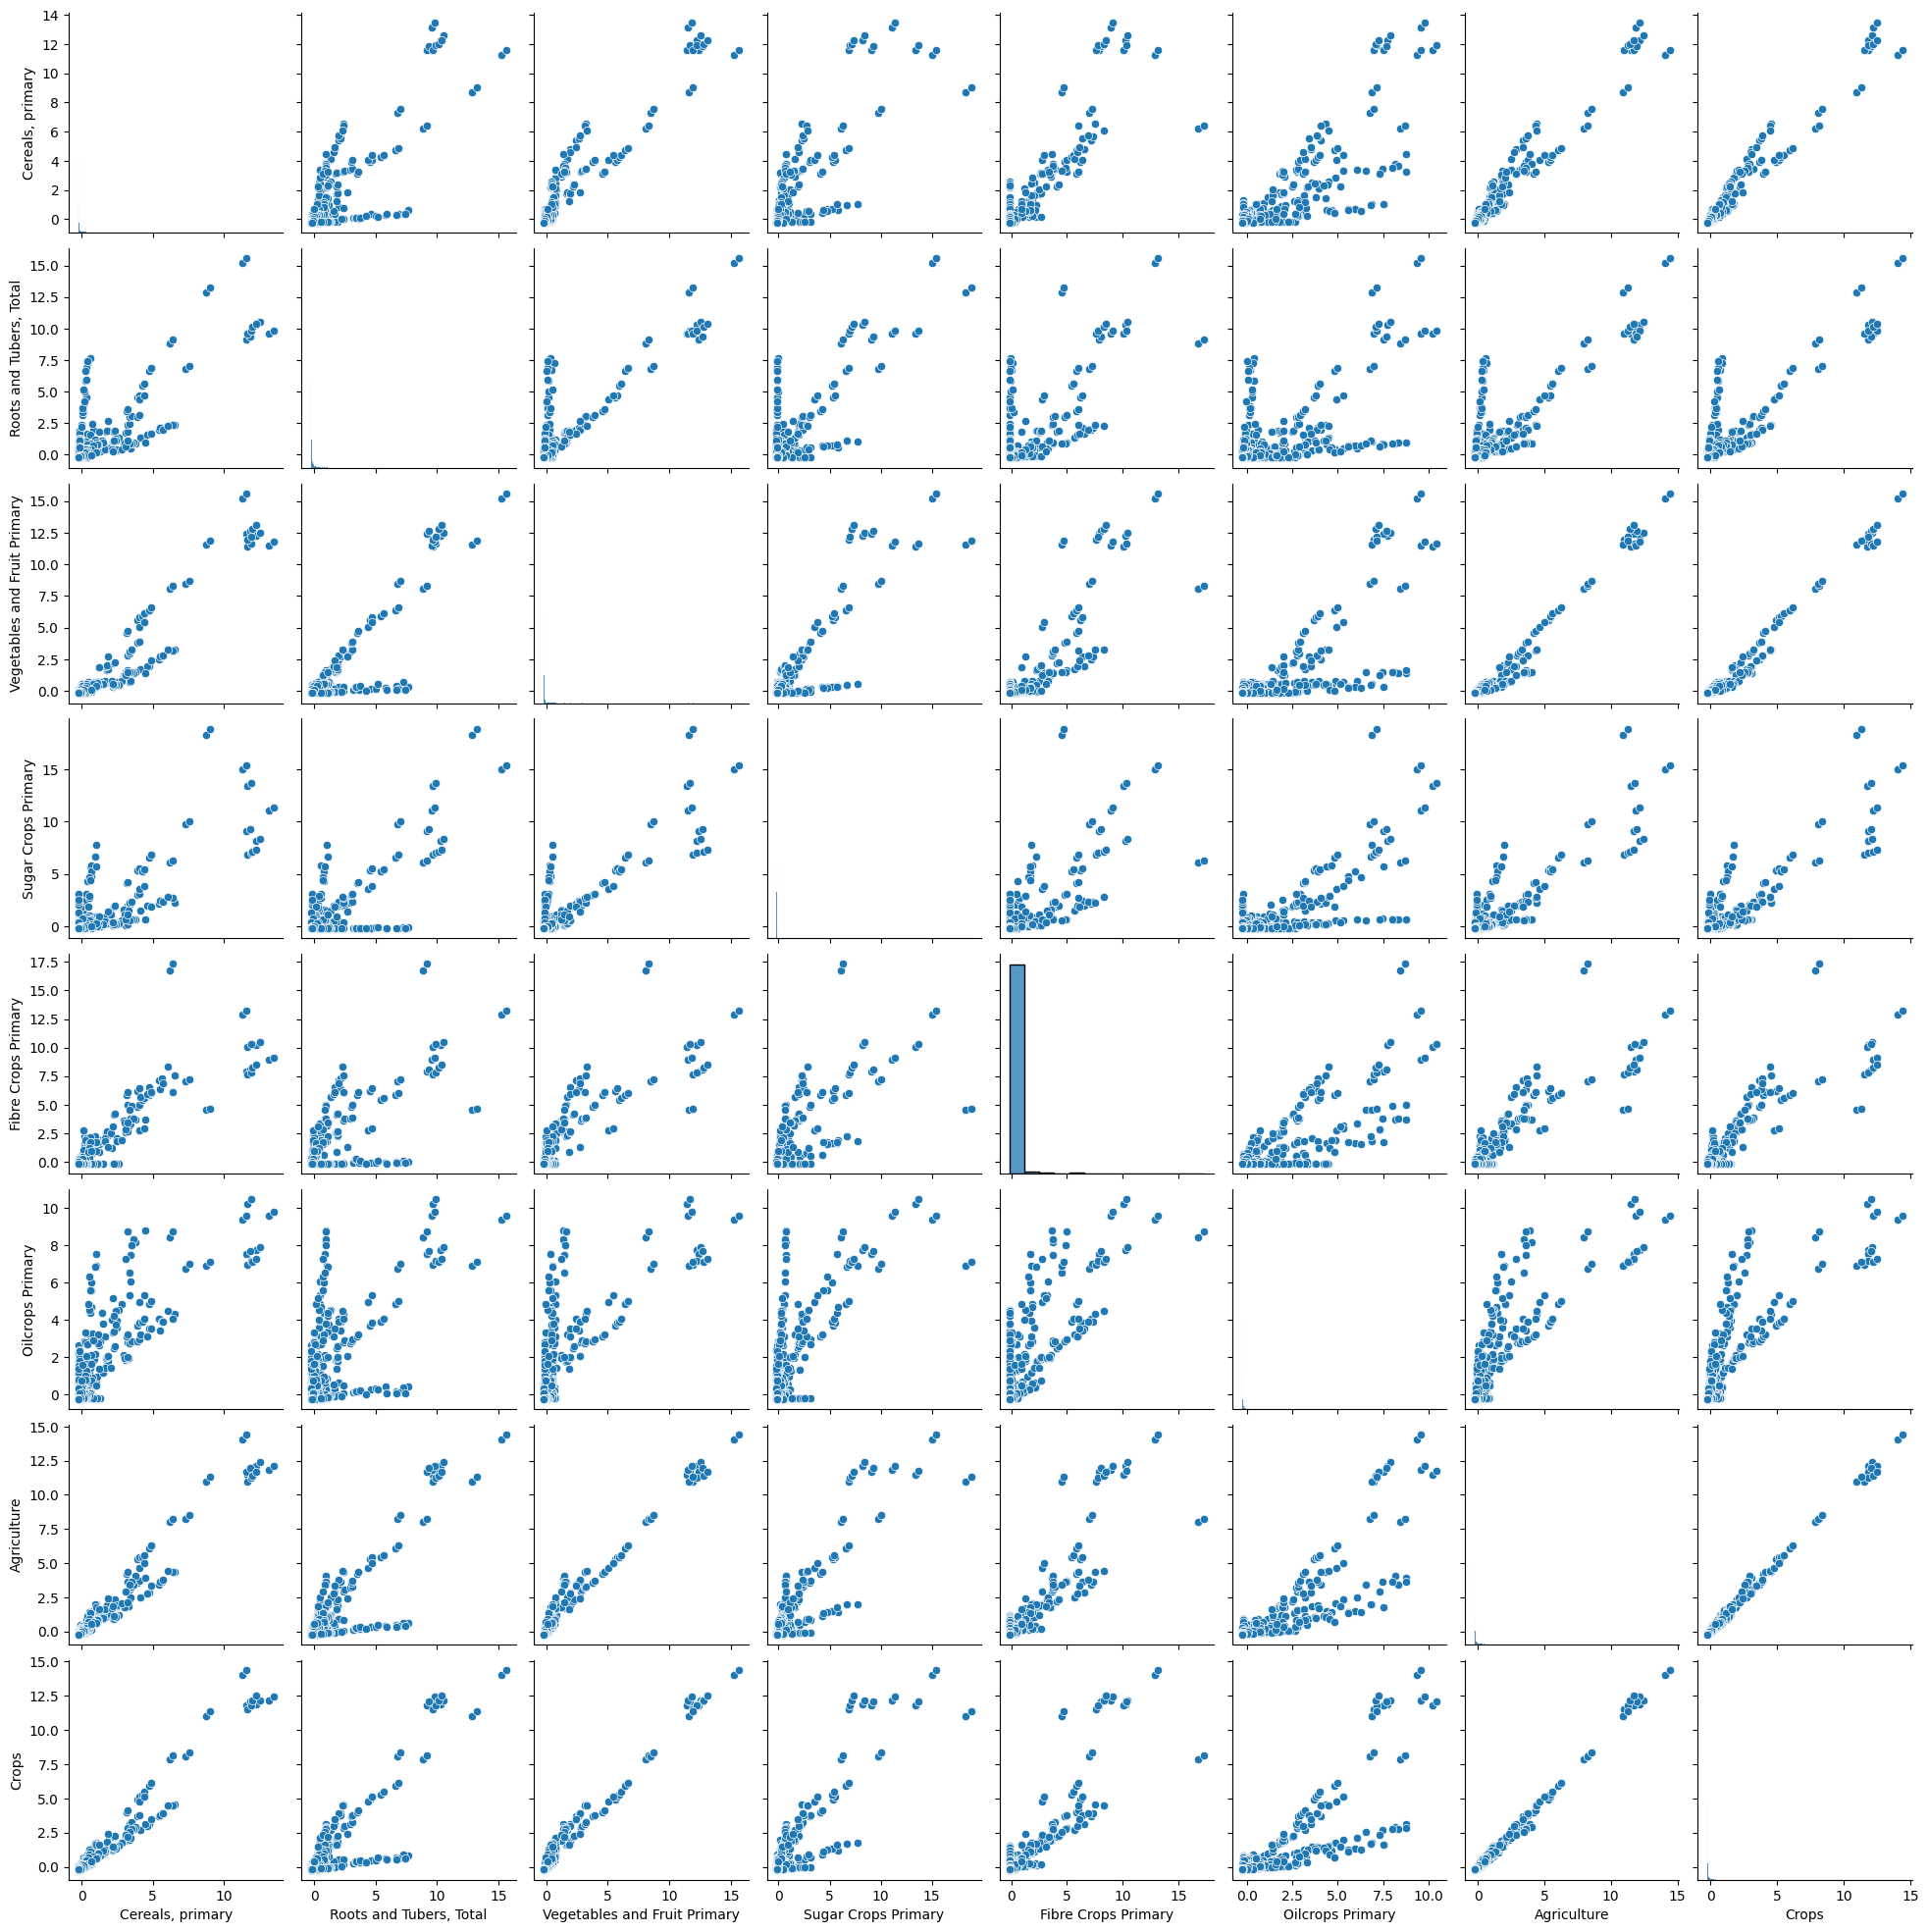

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

eda_data = pd.read_csv('cleaned_data.csv')

print("Summary Statistics:\n", eda_data.describe())

key_features = [
    'Cereals, primary', 'Roots and Tubers, Total', 'Vegetables and Fruit Primary',
    'Sugar Crops Primary', 'Fibre Crops Primary', 'Oilcrops Primary', 'Agriculture','Crops'
]

for feature in key_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(eda_data[feature], kde=True, bins=30)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

sns.pairplot(eda_data[key_features])
plt.show()


In [ ]:
from sklearn.cluster import KMeans

clustering_features = [
   'Cereals, primary',
    'Roots and Tubers, Total',
    'Vegetables and Fruit Primary',
    'Sugar Crops Primary',
    'Oilcrops Primary',
     'Percent of arable land equipped for irrigation (percent) (3-year average)',
    'Gross domestic product per capita, PPP, (constant 2017 international $)',
    'Political stability and absence of violence/terrorism (index)',
    'Average dietary energy supply adequacy (percent) (3-year average)',
    'Dietary energy supply used in the estimation of prevalence of undernourishment (kcal/cap/day)'
]
clustering_data = eda_data[clustering_features]

kmeans = KMeans(n_clusters=3, random_state=42)
eda_data['Cluster'] = kmeans.fit_predict(clustering_data)

numeric_columns = eda_data.select_dtypes(include=['float64', 'int64']).columns
cluster_summary = eda_data.groupby('Cluster')[numeric_columns].mean()
print("Cluster Summary:\n", cluster_summary)

# Assign names based on cluster characteristics
cluster_labels = {
    0: "High-Production Regions",
    1: "Medium-Production Regions",
    2: "Low-Production Regions"
}
eda_data['Cluster_Name'] = eda_data['Cluster'].map(cluster_labels)

eda_data.to_csv('clustered_data.csv', index=False)
print("Clusters named and saved to 'clustered_data.csv'.")


Cluster Summary:
              Year  Cereals, primary  Roots and Tubers, Total  \
Cluster                                                        
0       -0.065033         -0.114364                -0.072722   
1        0.446907          9.072473                 9.094876   
2        0.060962         -0.026770                -0.070794   

         Vegetables and Fruit Primary  Sugar Crops Primary  \
Cluster                                                      
0                           -0.121854            -0.109396   
1                           10.218945             9.309811   
2                           -0.037453            -0.035816   

         Fibre Crops Primary  Oilcrops Primary  Agriculture     Crops  \
Cluster                                                                 
0                  -0.085976         -0.174895    -0.138016 -0.122460   
1                   8.494212          7.174678     9.768636  9.835937   
2                  -0.047185          0.067380    -0.01322

In [ ]:
clustered_data = pd.read_csv('clustered_data.csv')

In [ ]:
#Check for remaining NaN values in the dataset
missing_values = clustered_data.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])


Missing Values:
 Series([], dtype: int64)


In [ ]:
# Fill NaN values in numeric columns with the median
#for column in clustered_data.select_dtypes(include=['float64', 'int64']).columns:
#    clustered_data[column] = clustered_data[column].fillna(clustered_data[column].median())

# Verify no NaN values remain
#missing_values_after_fill = clustered_data.isnull().sum()
#print("Remaining Missing Values After Filling:\n", missing_values_after_fill)


In [ ]:
from sklearn.model_selection import train_test_split

# Define target variable and features
target_variable = 'Crops'  # Example
features = [
    'Cereals, primary',
    'Roots and Tubers, Total',
    'Vegetables and Fruit Primary',
    'Sugar Crops Primary',
    'Oilcrops Primary',
     'Percent of arable land equipped for irrigation (percent) (3-year average)',
    'Gross domestic product per capita, PPP, (constant 2017 international $)',
    'Political stability and absence of violence/terrorism (index)',
    'Average dietary energy supply adequacy (percent) (3-year average)',
    'Dietary energy supply used in the estimation of prevalence of undernourishment (kcal/cap/day)'
]

# Split data by cluster
cluster_data_splits = {}
for cluster_id in clustered_data['Cluster'].unique():
    cluster_data = clustered_data[clustered_data['Cluster'] == cluster_id]
    X = cluster_data[features]
    y = cluster_data[target_variable]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    cluster_data_splits[cluster_id] = (X_train, X_test, y_train, y_test)

print(f"Data prepared for {len(cluster_data_splits)} clusters.")


Data prepared for 3 clusters.


In [ ]:
#from sklearn.model_selection import train_test_split

# Define target variable and features
#target_variable = 'Average dietary energy supply adequacy (percent) (3-year average)'  # Example
#features = [
#    'Agriculture', 'Cereals, primary', 'Vegetables and Fruit Primary',
#    'Milk, Total', 'Meat indigenous, total', 'Roots and Tubers, Total',
#    'Gross domestic product per capita, PPP, (constant 2017 international $)'
#]

# Split data by cluster
#cluster_data_splits = {}
#for cluster_id in clustered_data['Cluster'].unique():
#    cluster_data = clustered_data[clustered_data['Cluster'] == cluster_id]
#    X = cluster_data[features]
#    y = cluster_data[target_variable]
#    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#    cluster_data_splits[cluster_id] = (X_train, X_test, y_train, y_test)

#print(f"Data prepared for {len(cluster_data_splits)} clusters.")


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def build_model(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_shape,)),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)  # Output layer for regression
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Train models for each cluster
models = {}
for cluster_id, (X_train, X_test, y_train, y_test) in cluster_data_splits.items():
    print(f"Training model for cluster: {cluster_id}")
    model = build_model(X_train.shape[1])
    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=50,
        batch_size=32,
        verbose=1
    )
    models[cluster_id] = model
    print(f"Model trained for cluster: {cluster_id}")


Training model for cluster: 2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1013 - mae: 0.2354 - val_loss: 0.0146 - val_mae: 0.0840
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0410 - mae: 0.1297 - val_loss: 0.0090 - val_mae: 0.0638
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0262 - mae: 0.1026 - val_loss: 0.0065 - val_mae: 0.0539
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0207 - mae: 0.0887 - val_loss: 0.0054 - val_mae: 0.0487
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0162 - mae: 0.0795 - val_loss: 0.0048 - val_mae: 0.0474
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0175 - mae: 0.0746 - val_loss: 0.0058 - val_mae: 0.0491
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0151 - mae: 0.0682 - val_loss: 0.0049 - val_mae: 0.0456
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0085 - mae: 0.0617 - val_loss: 0.0028 - val_mae: 0.0376
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0120 - mae: 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3040 - mae: 0.3008 - val_loss: 0.0807 - val_mae: 0.0975
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0736 - mae: 0.1340 - val_loss: 0.0197 - val_mae: 0.0602
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0384 - mae: 0.1084 - val_loss: 0.0057 - val_mae: 0.0495
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0177 - mae: 0.0904 - val_loss: 0.0034 - val_mae: 0.0468
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0119 - mae: 0.0747 - val_loss: 0.0027 - val_mae: 0.0382
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0131 - mae: 0.0722 - val_loss: 0.0053 - val_mae: 0.0404
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0141 - mae: 0.0692 - val_loss: 0.0039 - val_mae: 0.0411
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0079 - mae: 0.0603 - val_loss: 0.0029 - val_mae: 0.0328
Epoch 9/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0073 - mae: 0.0576 - va

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 182.8727 - mae: 12.7792 - val_loss: 172.5799 - val_mae: 12.9549
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 167.6053 - mae: 12.2405 - val_loss: 163.0181 - val_mae: 12.5981
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 162.2085 - mae: 11.9088 - val_loss: 153.9672 - val_mae: 12.2497
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 153.9475 - mae: 11.5625 - val_loss: 145.1418 - val_mae: 11.9002
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 141.1372 - mae: 11.2346 - val_loss: 136.4341 - val_mae: 11.5442
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 118.2649 - mae: 10.3861 - val_loss: 127.6999 - val_mae: 11.1743
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 113.4955 - mae: 10.0051 - val_loss: 119.0493 - val_mae: 10.7922
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 105.8134 - mae: 9.7447 - val_loss: 110.5912 - val_mae: 10.4049
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/st

In [ ]:
# Evaluate the models for each cluster
for cluster_id, (X_train, X_test, y_train, y_test) in cluster_data_splits.items():
    model = models[cluster_id]
    loss, mae = model.evaluate(X_test, y_test, verbose=0)
    print(f"Cluster: {cluster_id} - Test Loss: {loss:.4f}, Test MAE: {mae:.4f}")


Cluster: 2 - Test Loss: 0.0045, Test MAE: 0.0222
Cluster: 0 - Test Loss: 0.0011, Test MAE: 0.0232
Cluster: 1 - Test Loss: 0.1512, Test MAE: 0.2968


Visualizing training history for cluster: 2


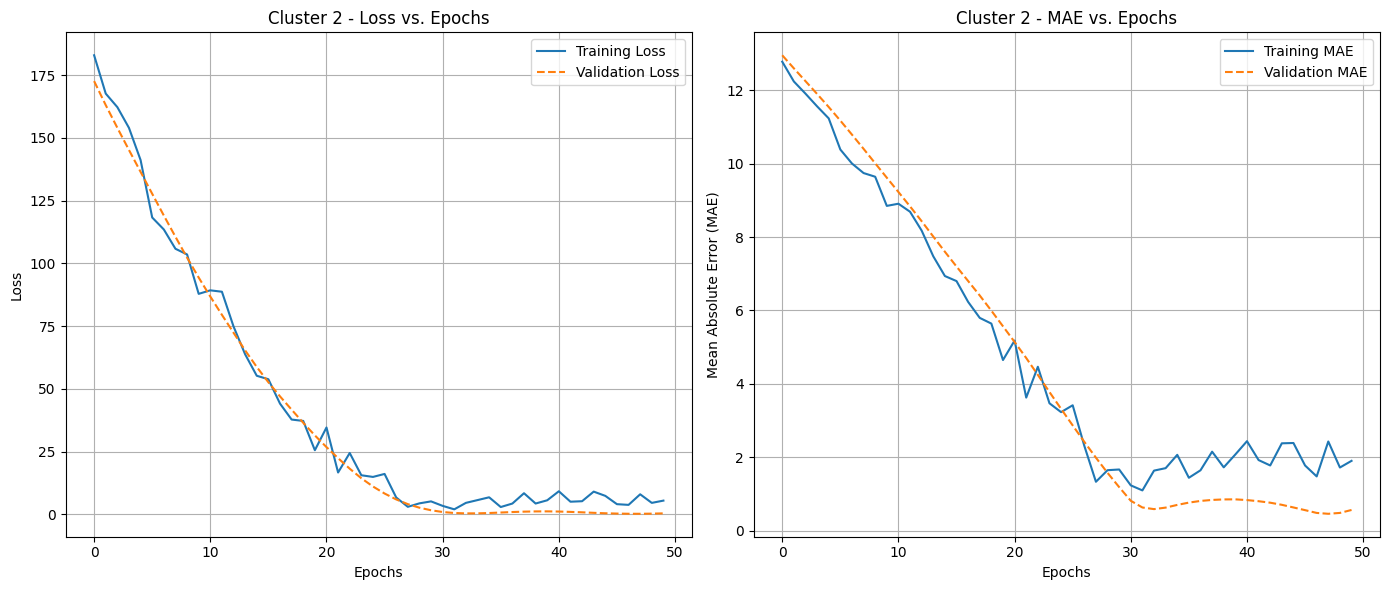

Visualizing training history for cluster: 0


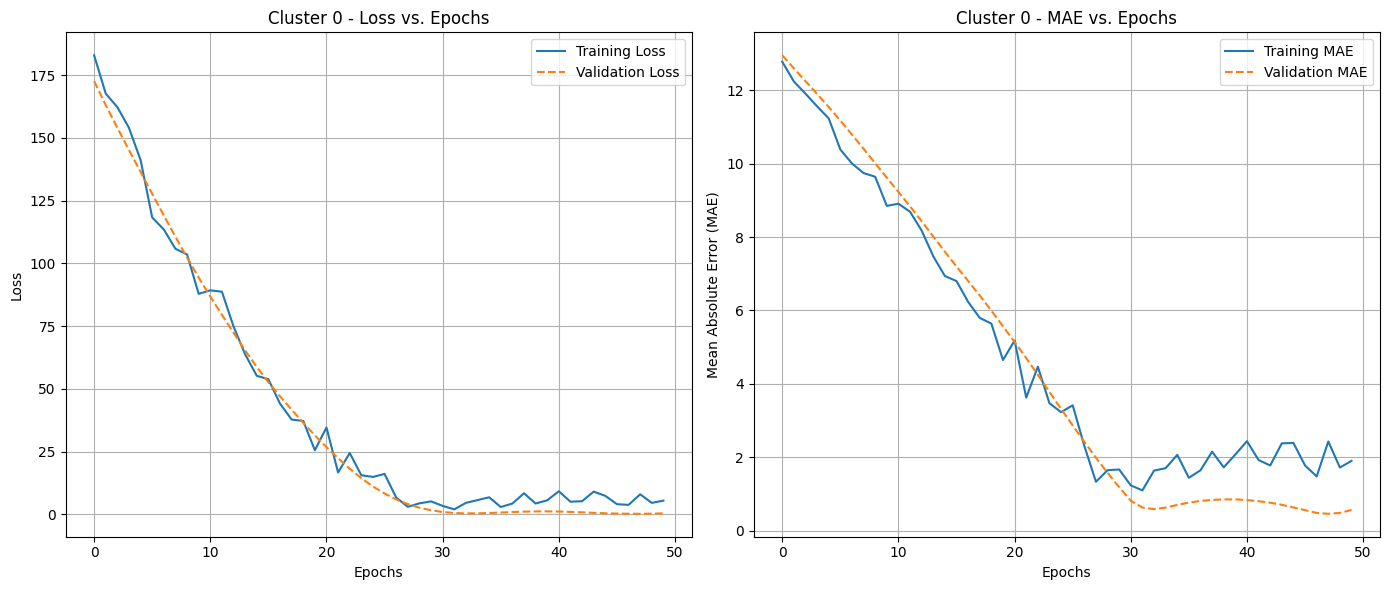

Visualizing training history for cluster: 1


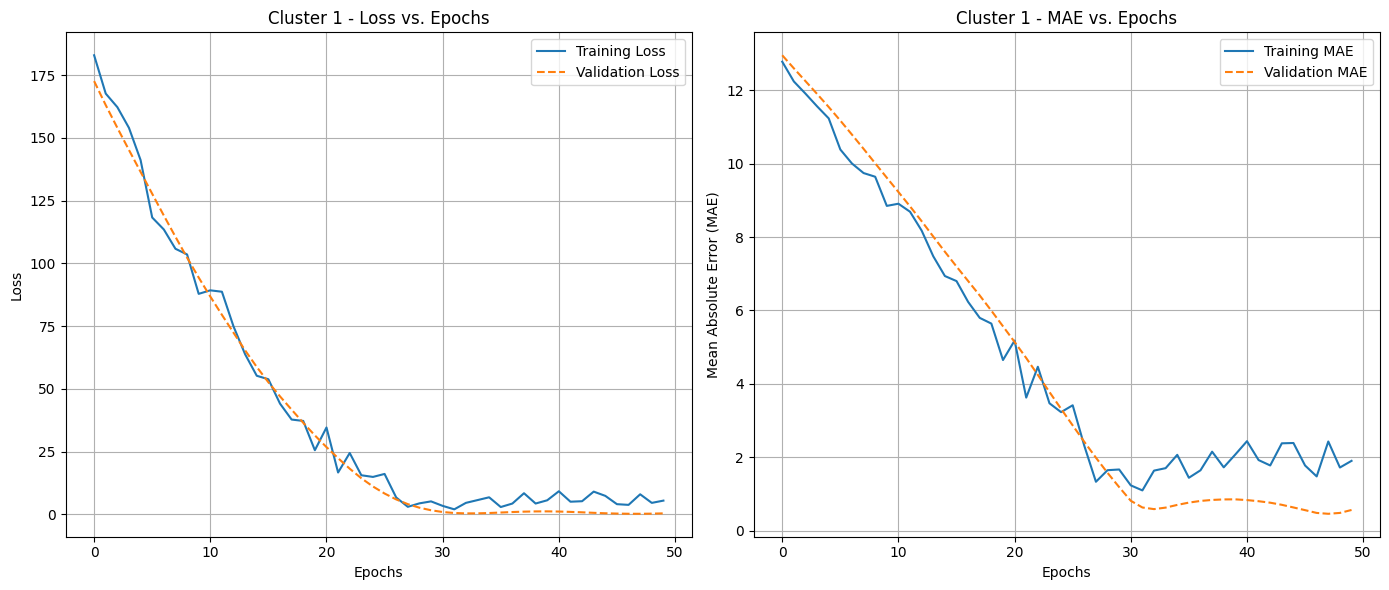

In [ ]:
def plot_training_history(history, cluster_id):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    mae = history.history['mae']
    val_mae = history.history['val_mae']

    plt.figure(figsize=(14, 6))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss', linestyle='--')
    plt.title(f'Cluster {cluster_id} - Loss vs. Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Plot MAE
    plt.subplot(1, 2, 2)
    plt.plot(mae, label='Training MAE')
    plt.plot(val_mae, label='Validation MAE', linestyle='--')
    plt.title(f'Cluster {cluster_id} - MAE vs. Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Absolute Error (MAE)')
    plt.legend()
    plt.grid(True)

    # Show plots
    plt.tight_layout()
    plt.show()

# Assuming `history` is saved for each cluster
for cluster_id, model in models.items():
    print(f"Visualizing training history for cluster: {cluster_id}")
    # Assuming you saved history objects in a dictionary similar to models
    plot_training_history(history, cluster_id)


In [ ]:
# Prepare the global dataset
X_global = clustered_data[features]
y_global = clustered_data[target_variable]

# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train_global, X_test_global, y_train_global, y_test_global = train_test_split(X_global, y_global, test_size=0.2, random_state=42)

# Build and train the global model
global_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_global.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])
global_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the global model
global_history = global_model.fit(
    X_train_global, y_train_global,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)

# Evaluate the global model
global_loss, global_mae = global_model.evaluate(X_test_global, y_test_global, verbose=0)
print(f"Global Model - Test Loss: {global_loss:.4f}, Test MAE: {global_mae:.4f}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.3437 - mae: 0.2680 - val_loss: 0.0263 - val_mae: 0.0757
Epoch 2/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1442 - mae: 0.1402 - val_loss: 0.0093 - val_mae: 0.0544
Epoch 3/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0547 - mae: 0.1060 - val_loss: 0.0072 - val_mae: 0.0515
Epoch 4/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0450 - mae: 0.0915 - val_loss: 0.0062 - val_mae: 0.0438
Epoch 5/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0387 - mae: 0.0864 - val_loss: 0.0051 - val_mae: 0.0396
Epoch 6/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0212 - mae: 0.0752 - val_loss: 0.0149 - val_mae: 0.0451
Epoch 7/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0271 - mae: 0.0759 - val_loss: 0.0572 - val_mae: 0.0656
Epoch 8/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0707 - mae: 0.0881 - val_loss: 0.0062 - val_mae: 0.0356
Epoch 9/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0343 - mae: 0.0673 - 

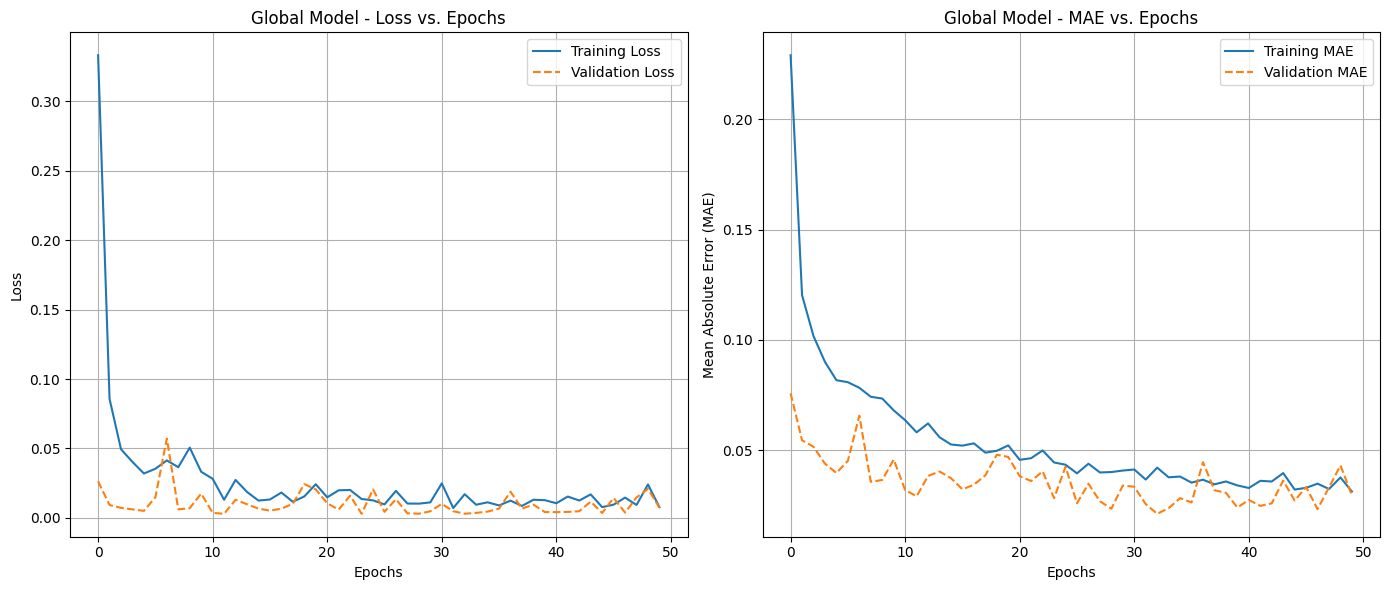

In [ ]:
# Function to plot metrics for the global model's training history
def plot_global_training_history(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    mae = history.history['mae']
    val_mae = history.history['val_mae']

    # Creating subplots for loss and MAE
    plt.figure(figsize=(14, 6))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss', linestyle='--')
    plt.title('Global Model - Loss vs. Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Plot MAE
    plt.subplot(1, 2, 2)
    plt.plot(mae, label='Training MAE')
    plt.plot(val_mae, label='Validation MAE', linestyle='--')
    plt.title('Global Model - MAE vs. Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Absolute Error (MAE)')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Call the function with the global history object
plot_global_training_history(global_history)


In [ ]:
from tensorflow.keras.optimizers import Adam

# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'batch_size': [16, 32, 64],
    'neurons': [32, 64, 128],
    'dropout_rate': [0.2, 0.3, 0.5]
}

# Define a function to build the model
def build_model(input_shape, learning_rate, neurons, dropout_rate):
    model = Sequential([
        Dense(neurons, activation='relu', input_shape=(input_shape,)),
        Dropout(dropout_rate),
        Dense(neurons // 2, activation='relu'),
        Dense(1)  # Output layer for regression
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model

# Perform grid search
best_model = None
best_params = None
best_mae = np.inf

# Initialize a DataFrame to store results
results = []

X_train, X_test, y_train, y_test = cluster_data_splits[0]  # Example: tuning for Cluster 0
input_shape = X_train.shape[1]

# Perform grid search
for lr in param_grid['learning_rate']:
    for batch_size in param_grid['batch_size']:
        for neurons in param_grid['neurons']:
            for dropout_rate in param_grid['dropout_rate']:
                print(f"Testing: LR={lr}, Batch={batch_size}, Neurons={neurons}, Dropout={dropout_rate}")

                # Build and train the model
                model = build_model(input_shape, lr, neurons, dropout_rate)
                history = model.fit(
                    X_train, y_train,
                    validation_split=0.2,
                    epochs=50,
                    batch_size=batch_size,
                    verbose=0
                )

                # Evaluate the model
                loss, mae = model.evaluate(X_test, y_test, verbose=0)
                print(f"MAE: {mae:.4f}")

                # Store results
                results.append({
                    'learning_rate': lr,
                    'batch_size': batch_size,
                    'neurons': neurons,
                    'dropout_rate': dropout_rate,
                    'mae': mae
                })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Save results to a CSV file
results_df.to_csv('hyperparameter_tuning_results.csv', index=False)
print("Hyperparameter tuning results saved to 'hyperparameter_tuning_results.csv'.")


Testing: LR=0.001, Batch=16, Neurons=32, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0368
Testing: LR=0.001, Batch=16, Neurons=32, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0297
Testing: LR=0.001, Batch=16, Neurons=32, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0318
Testing: LR=0.001, Batch=16, Neurons=64, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0341
Testing: LR=0.001, Batch=16, Neurons=64, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0162
Testing: LR=0.001, Batch=16, Neurons=64, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0354
Testing: LR=0.001, Batch=16, Neurons=128, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0108
Testing: LR=0.001, Batch=16, Neurons=128, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0172
Testing: LR=0.001, Batch=16, Neurons=128, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0272
Testing: LR=0.001, Batch=32, Neurons=32, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0214
Testing: LR=0.001, Batch=32, Neurons=32, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0362
Testing: LR=0.001, Batch=32, Neurons=32, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0421
Testing: LR=0.001, Batch=32, Neurons=64, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0254
Testing: LR=0.001, Batch=32, Neurons=64, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0248
Testing: LR=0.001, Batch=32, Neurons=64, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0435
Testing: LR=0.001, Batch=32, Neurons=128, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0180
Testing: LR=0.001, Batch=32, Neurons=128, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0122
Testing: LR=0.001, Batch=32, Neurons=128, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0340
Testing: LR=0.001, Batch=64, Neurons=32, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0253
Testing: LR=0.001, Batch=64, Neurons=32, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0250
Testing: LR=0.001, Batch=64, Neurons=32, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0396
Testing: LR=0.001, Batch=64, Neurons=64, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0212
Testing: LR=0.001, Batch=64, Neurons=64, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0262
Testing: LR=0.001, Batch=64, Neurons=64, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0327
Testing: LR=0.001, Batch=64, Neurons=128, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0179
Testing: LR=0.001, Batch=64, Neurons=128, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0278
Testing: LR=0.001, Batch=64, Neurons=128, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0325
Testing: LR=0.01, Batch=16, Neurons=32, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0927
Testing: LR=0.01, Batch=16, Neurons=32, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1414
Testing: LR=0.01, Batch=16, Neurons=32, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1920
Testing: LR=0.01, Batch=16, Neurons=64, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1014
Testing: LR=0.01, Batch=16, Neurons=64, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1460
Testing: LR=0.01, Batch=16, Neurons=64, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0976
Testing: LR=0.01, Batch=16, Neurons=128, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1250
Testing: LR=0.01, Batch=16, Neurons=128, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1414
Testing: LR=0.01, Batch=16, Neurons=128, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1127
Testing: LR=0.01, Batch=32, Neurons=32, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0700
Testing: LR=0.01, Batch=32, Neurons=32, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0797
Testing: LR=0.01, Batch=32, Neurons=32, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0919
Testing: LR=0.01, Batch=32, Neurons=64, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0821
Testing: LR=0.01, Batch=32, Neurons=64, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1330
Testing: LR=0.01, Batch=32, Neurons=64, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.2006
Testing: LR=0.01, Batch=32, Neurons=128, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1047
Testing: LR=0.01, Batch=32, Neurons=128, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0745
Testing: LR=0.01, Batch=32, Neurons=128, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1717
Testing: LR=0.01, Batch=64, Neurons=32, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0189
Testing: LR=0.01, Batch=64, Neurons=32, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0586
Testing: LR=0.01, Batch=64, Neurons=32, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0371
Testing: LR=0.01, Batch=64, Neurons=64, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0418
Testing: LR=0.01, Batch=64, Neurons=64, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0752
Testing: LR=0.01, Batch=64, Neurons=64, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1007
Testing: LR=0.01, Batch=64, Neurons=128, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0594
Testing: LR=0.01, Batch=64, Neurons=128, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0612
Testing: LR=0.01, Batch=64, Neurons=128, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1411
Testing: LR=0.1, Batch=16, Neurons=32, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1393
Testing: LR=0.1, Batch=16, Neurons=32, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1144
Testing: LR=0.1, Batch=16, Neurons=32, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1360
Testing: LR=0.1, Batch=16, Neurons=64, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1100
Testing: LR=0.1, Batch=16, Neurons=64, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1407
Testing: LR=0.1, Batch=16, Neurons=64, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1449
Testing: LR=0.1, Batch=16, Neurons=128, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.2344
Testing: LR=0.1, Batch=16, Neurons=128, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1042
Testing: LR=0.1, Batch=16, Neurons=128, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1843
Testing: LR=0.1, Batch=32, Neurons=32, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0960
Testing: LR=0.1, Batch=32, Neurons=32, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1735
Testing: LR=0.1, Batch=32, Neurons=32, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1140
Testing: LR=0.1, Batch=32, Neurons=64, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1129
Testing: LR=0.1, Batch=32, Neurons=64, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1599
Testing: LR=0.1, Batch=32, Neurons=64, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1277
Testing: LR=0.1, Batch=32, Neurons=128, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0715
Testing: LR=0.1, Batch=32, Neurons=128, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1059
Testing: LR=0.1, Batch=32, Neurons=128, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0755
Testing: LR=0.1, Batch=64, Neurons=32, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1230
Testing: LR=0.1, Batch=64, Neurons=32, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1113
Testing: LR=0.1, Batch=64, Neurons=32, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1152
Testing: LR=0.1, Batch=64, Neurons=64, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1291
Testing: LR=0.1, Batch=64, Neurons=64, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1063
Testing: LR=0.1, Batch=64, Neurons=64, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0977
Testing: LR=0.1, Batch=64, Neurons=128, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1223
Testing: LR=0.1, Batch=64, Neurons=128, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1169
Testing: LR=0.1, Batch=64, Neurons=128, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1027
Hyperparameter tuning results saved to 'hyperparameter_tuning_results.csv'.


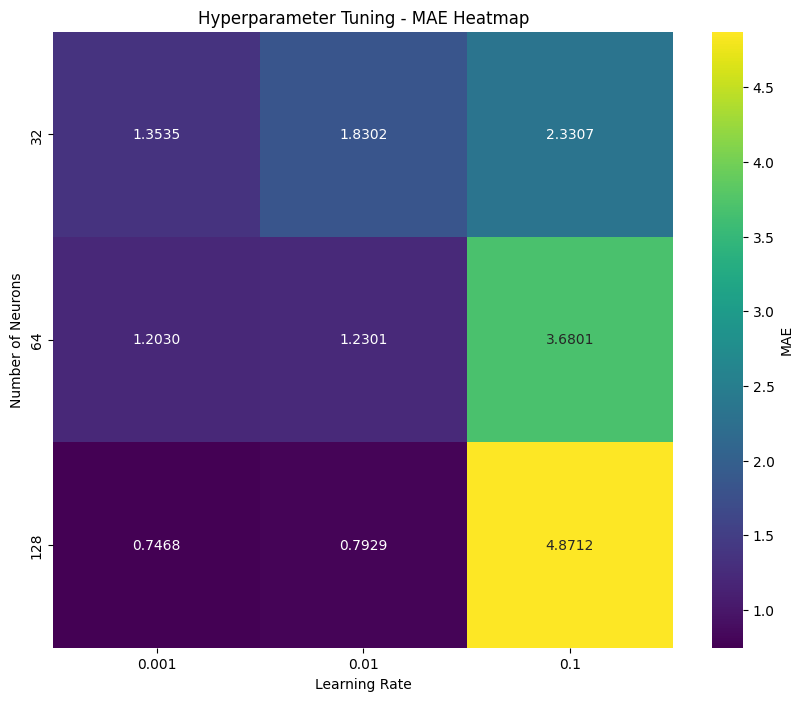

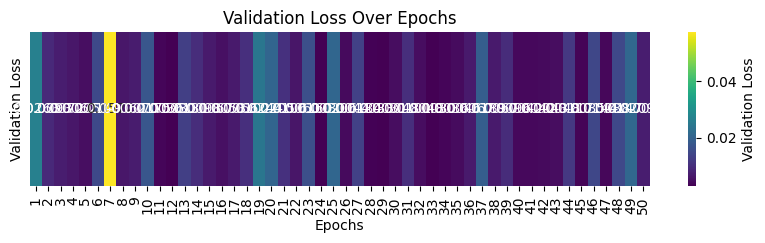

In [ ]:
# Pivot the data for heatmap visualization
heatmap_data = results_df.pivot_table(
    index='neurons', columns='learning_rate', values='mae', aggfunc='mean'
)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".4f", cmap="viridis", cbar_kws={'label': 'MAE'})
plt.title('Hyperparameter Tuning - MAE Heatmap')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Neurons')
plt.show()

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot a heatmap of validation loss
def plot_validation_loss_heatmap(history):

    val_loss = history.history['val_loss']

    heatmap_data = np.array(val_loss).reshape(1, -1)

    # Plot the heatmap
    plt.figure(figsize=(10, 2))
    sns.heatmap(heatmap_data, annot=True, fmt=".4f", cmap="viridis", cbar_kws={'label': 'Validation Loss'})
    plt.title('Validation Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Validation Loss')
    plt.xticks(ticks=np.arange(len(val_loss)) + 0.5, labels=np.arange(1, len(val_loss) + 1), rotation=90)
    plt.yticks([], [])
    plt.show()


plot_validation_loss_heatmap(global_history)



Starting hyperparameter tuning for Cluster 2
Testing: LR=0.001, Batch=16, Neurons=32, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0277
Testing: LR=0.001, Batch=16, Neurons=32, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0358
Testing: LR=0.001, Batch=16, Neurons=32, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0638
Testing: LR=0.001, Batch=16, Neurons=64, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0214
Testing: LR=0.001, Batch=16, Neurons=64, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0294
Testing: LR=0.001, Batch=16, Neurons=64, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0332
Testing: LR=0.001, Batch=16, Neurons=128, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0109
Testing: LR=0.001, Batch=16, Neurons=128, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0290
Testing: LR=0.001, Batch=16, Neurons=128, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0325
Testing: LR=0.001, Batch=32, Neurons=32, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0248
Testing: LR=0.001, Batch=32, Neurons=32, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0423
Testing: LR=0.001, Batch=32, Neurons=32, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0621
Testing: LR=0.001, Batch=32, Neurons=64, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0173
Testing: LR=0.001, Batch=32, Neurons=64, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0360
Testing: LR=0.001, Batch=32, Neurons=64, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0407
Testing: LR=0.001, Batch=32, Neurons=128, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0180
Testing: LR=0.001, Batch=32, Neurons=128, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0171
Testing: LR=0.001, Batch=32, Neurons=128, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0511
Testing: LR=0.001, Batch=64, Neurons=32, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0378
Testing: LR=0.001, Batch=64, Neurons=32, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0445
Testing: LR=0.001, Batch=64, Neurons=32, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0645
Testing: LR=0.001, Batch=64, Neurons=64, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0199
Testing: LR=0.001, Batch=64, Neurons=64, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0259
Testing: LR=0.001, Batch=64, Neurons=64, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0561
Testing: LR=0.001, Batch=64, Neurons=128, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0154
Testing: LR=0.001, Batch=64, Neurons=128, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0295
Testing: LR=0.001, Batch=64, Neurons=128, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0450
Testing: LR=0.01, Batch=16, Neurons=32, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0687
Testing: LR=0.01, Batch=16, Neurons=32, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1581
Testing: LR=0.01, Batch=16, Neurons=32, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1498
Testing: LR=0.01, Batch=16, Neurons=64, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1330
Testing: LR=0.01, Batch=16, Neurons=64, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1241
Testing: LR=0.01, Batch=16, Neurons=64, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1506
Testing: LR=0.01, Batch=16, Neurons=128, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0676
Testing: LR=0.01, Batch=16, Neurons=128, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1153
Testing: LR=0.01, Batch=16, Neurons=128, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1292
Testing: LR=0.01, Batch=32, Neurons=32, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0362
Testing: LR=0.01, Batch=32, Neurons=32, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0894
Testing: LR=0.01, Batch=32, Neurons=32, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1181
Testing: LR=0.01, Batch=32, Neurons=64, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0631
Testing: LR=0.01, Batch=32, Neurons=64, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0604
Testing: LR=0.01, Batch=32, Neurons=64, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.2152
Testing: LR=0.01, Batch=32, Neurons=128, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0715
Testing: LR=0.01, Batch=32, Neurons=128, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1124
Testing: LR=0.01, Batch=32, Neurons=128, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.2005
Testing: LR=0.01, Batch=64, Neurons=32, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0345
Testing: LR=0.01, Batch=64, Neurons=32, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0585
Testing: LR=0.01, Batch=64, Neurons=32, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0859
Testing: LR=0.01, Batch=64, Neurons=64, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0271
Testing: LR=0.01, Batch=64, Neurons=64, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0713
Testing: LR=0.01, Batch=64, Neurons=64, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1022
Testing: LR=0.01, Batch=64, Neurons=128, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0349
Testing: LR=0.01, Batch=64, Neurons=128, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0496
Testing: LR=0.01, Batch=64, Neurons=128, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1151
Testing: LR=0.1, Batch=16, Neurons=32, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.2136
Testing: LR=0.1, Batch=16, Neurons=32, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.2763
Testing: LR=0.1, Batch=16, Neurons=32, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.2386
Testing: LR=0.1, Batch=16, Neurons=64, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0965
Testing: LR=0.1, Batch=16, Neurons=64, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0909
Testing: LR=0.1, Batch=16, Neurons=64, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1577
Testing: LR=0.1, Batch=16, Neurons=128, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1124
Testing: LR=0.1, Batch=16, Neurons=128, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.2299
Testing: LR=0.1, Batch=16, Neurons=128, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.2952
Testing: LR=0.1, Batch=32, Neurons=32, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0479
Testing: LR=0.1, Batch=32, Neurons=32, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.2199
Testing: LR=0.1, Batch=32, Neurons=32, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0976
Testing: LR=0.1, Batch=32, Neurons=64, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0775
Testing: LR=0.1, Batch=32, Neurons=64, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1605
Testing: LR=0.1, Batch=32, Neurons=64, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1121
Testing: LR=0.1, Batch=32, Neurons=128, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.2720
Testing: LR=0.1, Batch=32, Neurons=128, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0670
Testing: LR=0.1, Batch=32, Neurons=128, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1150
Testing: LR=0.1, Batch=64, Neurons=32, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0460
Testing: LR=0.1, Batch=64, Neurons=32, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0946
Testing: LR=0.1, Batch=64, Neurons=32, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1174
Testing: LR=0.1, Batch=64, Neurons=64, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0473
Testing: LR=0.1, Batch=64, Neurons=64, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1234
Testing: LR=0.1, Batch=64, Neurons=64, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.2382
Testing: LR=0.1, Batch=64, Neurons=128, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0384
Testing: LR=0.1, Batch=64, Neurons=128, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0528
Testing: LR=0.1, Batch=64, Neurons=128, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0690
Hyperparameter tuning results saved to 'hyperparameter_tuning_cluster_2.csv'.


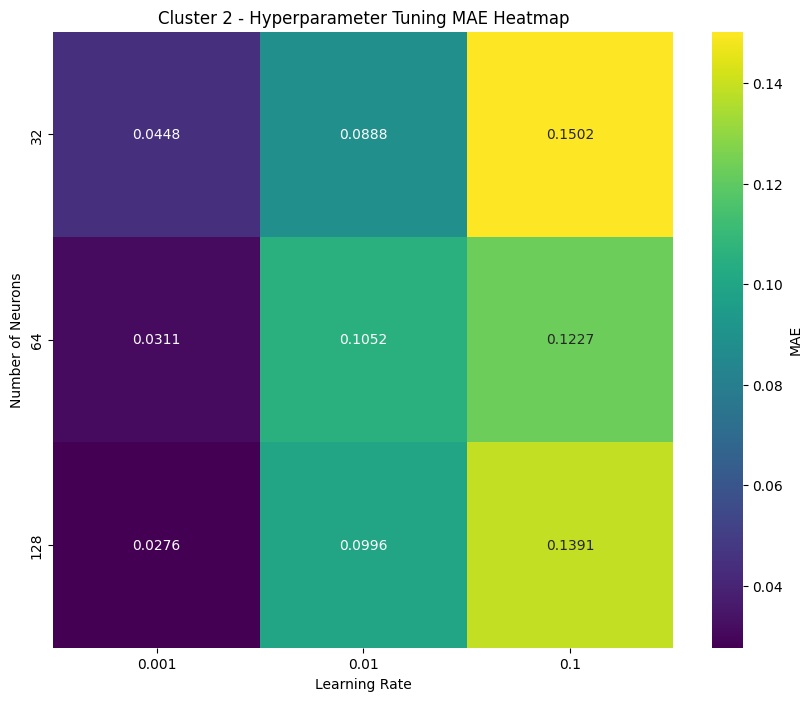

Starting hyperparameter tuning for Cluster 0
Testing: LR=0.001, Batch=16, Neurons=32, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0248
Testing: LR=0.001, Batch=16, Neurons=32, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0362
Testing: LR=0.001, Batch=16, Neurons=32, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0481
Testing: LR=0.001, Batch=16, Neurons=64, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0158
Testing: LR=0.001, Batch=16, Neurons=64, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0220
Testing: LR=0.001, Batch=16, Neurons=64, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0188
Testing: LR=0.001, Batch=16, Neurons=128, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0217
Testing: LR=0.001, Batch=16, Neurons=128, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0159
Testing: LR=0.001, Batch=16, Neurons=128, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0237
Testing: LR=0.001, Batch=32, Neurons=32, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0195
Testing: LR=0.001, Batch=32, Neurons=32, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0202
Testing: LR=0.001, Batch=32, Neurons=32, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0288
Testing: LR=0.001, Batch=32, Neurons=64, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0165
Testing: LR=0.001, Batch=32, Neurons=64, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0225
Testing: LR=0.001, Batch=32, Neurons=64, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0531
Testing: LR=0.001, Batch=32, Neurons=128, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0176
Testing: LR=0.001, Batch=32, Neurons=128, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0204
Testing: LR=0.001, Batch=32, Neurons=128, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0347
Testing: LR=0.001, Batch=64, Neurons=32, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0284
Testing: LR=0.001, Batch=64, Neurons=32, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0346
Testing: LR=0.001, Batch=64, Neurons=32, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0500
Testing: LR=0.001, Batch=64, Neurons=64, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0189
Testing: LR=0.001, Batch=64, Neurons=64, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0161
Testing: LR=0.001, Batch=64, Neurons=64, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0383
Testing: LR=0.001, Batch=64, Neurons=128, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0173
Testing: LR=0.001, Batch=64, Neurons=128, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0220
Testing: LR=0.001, Batch=64, Neurons=128, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0328
Testing: LR=0.01, Batch=16, Neurons=32, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0727
Testing: LR=0.01, Batch=16, Neurons=32, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0735
Testing: LR=0.01, Batch=16, Neurons=32, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1395
Testing: LR=0.01, Batch=16, Neurons=64, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0833
Testing: LR=0.01, Batch=16, Neurons=64, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1313
Testing: LR=0.01, Batch=16, Neurons=64, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1569
Testing: LR=0.01, Batch=16, Neurons=128, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0283
Testing: LR=0.01, Batch=16, Neurons=128, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1016
Testing: LR=0.01, Batch=16, Neurons=128, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.2289
Testing: LR=0.01, Batch=32, Neurons=32, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0833
Testing: LR=0.01, Batch=32, Neurons=32, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0317
Testing: LR=0.01, Batch=32, Neurons=32, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0446
Testing: LR=0.01, Batch=32, Neurons=64, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0559
Testing: LR=0.01, Batch=32, Neurons=64, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0926
Testing: LR=0.01, Batch=32, Neurons=64, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1603
Testing: LR=0.01, Batch=32, Neurons=128, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0686
Testing: LR=0.01, Batch=32, Neurons=128, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1669
Testing: LR=0.01, Batch=32, Neurons=128, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.2117
Testing: LR=0.01, Batch=64, Neurons=32, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0484
Testing: LR=0.01, Batch=64, Neurons=32, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0433
Testing: LR=0.01, Batch=64, Neurons=32, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0870
Testing: LR=0.01, Batch=64, Neurons=64, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0305
Testing: LR=0.01, Batch=64, Neurons=64, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0208
Testing: LR=0.01, Batch=64, Neurons=64, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0999
Testing: LR=0.01, Batch=64, Neurons=128, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0499
Testing: LR=0.01, Batch=64, Neurons=128, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0847
Testing: LR=0.01, Batch=64, Neurons=128, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1236
Testing: LR=0.1, Batch=16, Neurons=32, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0968
Testing: LR=0.1, Batch=16, Neurons=32, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.2189
Testing: LR=0.1, Batch=16, Neurons=32, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1445
Testing: LR=0.1, Batch=16, Neurons=64, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1415
Testing: LR=0.1, Batch=16, Neurons=64, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1259
Testing: LR=0.1, Batch=16, Neurons=64, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1312
Testing: LR=0.1, Batch=16, Neurons=128, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0959
Testing: LR=0.1, Batch=16, Neurons=128, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1127
Testing: LR=0.1, Batch=16, Neurons=128, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0892
Testing: LR=0.1, Batch=32, Neurons=32, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1179
Testing: LR=0.1, Batch=32, Neurons=32, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0959
Testing: LR=0.1, Batch=32, Neurons=32, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1425
Testing: LR=0.1, Batch=32, Neurons=64, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.3489
Testing: LR=0.1, Batch=32, Neurons=64, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1200
Testing: LR=0.1, Batch=32, Neurons=64, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0938
Testing: LR=0.1, Batch=32, Neurons=128, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1035
Testing: LR=0.1, Batch=32, Neurons=128, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1084
Testing: LR=0.1, Batch=32, Neurons=128, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1306
Testing: LR=0.1, Batch=64, Neurons=32, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1189
Testing: LR=0.1, Batch=64, Neurons=32, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1081
Testing: LR=0.1, Batch=64, Neurons=32, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1924
Testing: LR=0.1, Batch=64, Neurons=64, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0756
Testing: LR=0.1, Batch=64, Neurons=64, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1583
Testing: LR=0.1, Batch=64, Neurons=64, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0994
Testing: LR=0.1, Batch=64, Neurons=128, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0679
Testing: LR=0.1, Batch=64, Neurons=128, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0670
Testing: LR=0.1, Batch=64, Neurons=128, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0961
Hyperparameter tuning results saved to 'hyperparameter_tuning_cluster_0.csv'.


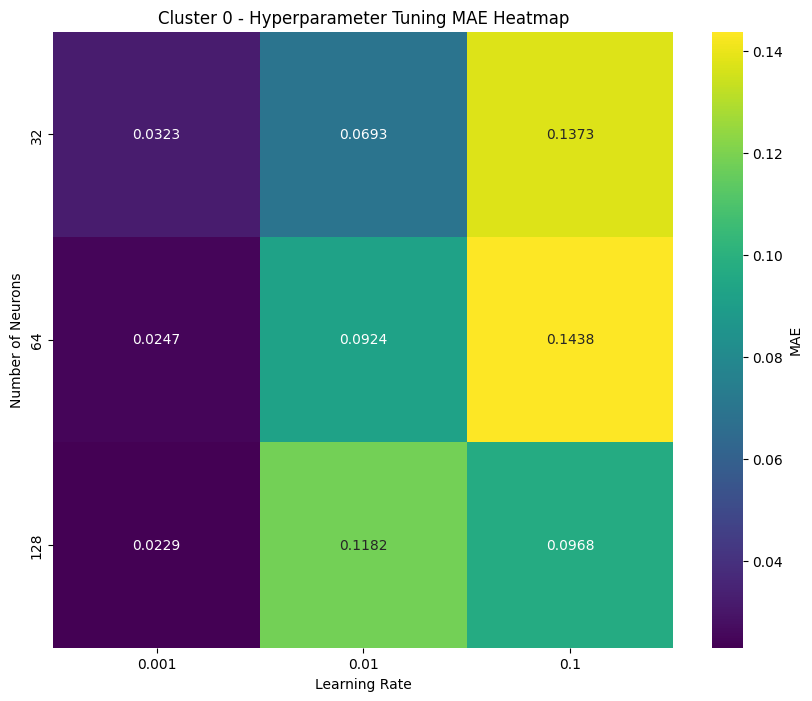

Starting hyperparameter tuning for Cluster 1
Testing: LR=0.001, Batch=16, Neurons=32, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.6563
Testing: LR=0.001, Batch=16, Neurons=32, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 1.9656
Testing: LR=0.001, Batch=16, Neurons=32, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.3626
Testing: LR=0.001, Batch=16, Neurons=64, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.3315
Testing: LR=0.001, Batch=16, Neurons=64, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 1.1294
Testing: LR=0.001, Batch=16, Neurons=64, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.7871
Testing: LR=0.001, Batch=16, Neurons=128, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.5099
Testing: LR=0.001, Batch=16, Neurons=128, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.5250
Testing: LR=0.001, Batch=16, Neurons=128, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.9623
Testing: LR=0.001, Batch=32, Neurons=32, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 2.2812
Testing: LR=0.001, Batch=32, Neurons=32, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 1.7106
Testing: LR=0.001, Batch=32, Neurons=32, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.7600
Testing: LR=0.001, Batch=32, Neurons=64, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.9149
Testing: LR=0.001, Batch=32, Neurons=64, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 1.4306
Testing: LR=0.001, Batch=32, Neurons=64, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 1.5190
Testing: LR=0.001, Batch=32, Neurons=128, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.9803
Testing: LR=0.001, Batch=32, Neurons=128, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.4486
Testing: LR=0.001, Batch=32, Neurons=128, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.9984
Testing: LR=0.001, Batch=64, Neurons=32, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.6880
Testing: LR=0.001, Batch=64, Neurons=32, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.8339
Testing: LR=0.001, Batch=64, Neurons=32, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 2.9235
Testing: LR=0.001, Batch=64, Neurons=64, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.4613
Testing: LR=0.001, Batch=64, Neurons=64, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 3.2059
Testing: LR=0.001, Batch=64, Neurons=64, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 1.0472
Testing: LR=0.001, Batch=64, Neurons=128, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.8102
Testing: LR=0.001, Batch=64, Neurons=128, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.9981
Testing: LR=0.001, Batch=64, Neurons=128, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.4886
Testing: LR=0.01, Batch=16, Neurons=32, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 1.2298
Testing: LR=0.01, Batch=16, Neurons=32, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 1.9639
Testing: LR=0.01, Batch=16, Neurons=32, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 2.6256
Testing: LR=0.01, Batch=16, Neurons=64, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.3292
Testing: LR=0.01, Batch=16, Neurons=64, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1594
Testing: LR=0.01, Batch=16, Neurons=64, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.9357
Testing: LR=0.01, Batch=16, Neurons=128, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1738
Testing: LR=0.01, Batch=16, Neurons=128, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.3719
Testing: LR=0.01, Batch=16, Neurons=128, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 1.5962
Testing: LR=0.01, Batch=32, Neurons=32, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 1.4341
Testing: LR=0.01, Batch=32, Neurons=32, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 1.6603
Testing: LR=0.01, Batch=32, Neurons=32, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 1.8677
Testing: LR=0.01, Batch=32, Neurons=64, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.8868
Testing: LR=0.01, Batch=32, Neurons=64, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 1.7195
Testing: LR=0.01, Batch=32, Neurons=64, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 2.9042
Testing: LR=0.01, Batch=32, Neurons=128, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.8720
Testing: LR=0.01, Batch=32, Neurons=128, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 1.1578
Testing: LR=0.01, Batch=32, Neurons=128, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.8043
Testing: LR=0.01, Batch=64, Neurons=32, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 1.0212
Testing: LR=0.01, Batch=64, Neurons=32, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 1.8766
Testing: LR=0.01, Batch=64, Neurons=32, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 2.7930
Testing: LR=0.01, Batch=64, Neurons=64, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.4948
Testing: LR=0.01, Batch=64, Neurons=64, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.9384
Testing: LR=0.01, Batch=64, Neurons=64, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 2.7029
Testing: LR=0.01, Batch=64, Neurons=128, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1739
Testing: LR=0.01, Batch=64, Neurons=128, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.2024
Testing: LR=0.01, Batch=64, Neurons=128, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 1.7836
Testing: LR=0.1, Batch=16, Neurons=32, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 2.1884
Testing: LR=0.1, Batch=16, Neurons=32, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 1.6198
Testing: LR=0.1, Batch=16, Neurons=32, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 2.5139
Testing: LR=0.1, Batch=16, Neurons=64, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 2.5481
Testing: LR=0.1, Batch=16, Neurons=64, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 2.2948
Testing: LR=0.1, Batch=16, Neurons=64, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 4.5006
Testing: LR=0.1, Batch=16, Neurons=128, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 2.5481
Testing: LR=0.1, Batch=16, Neurons=128, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 2.5481
Testing: LR=0.1, Batch=16, Neurons=128, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 9.1082
Testing: LR=0.1, Batch=32, Neurons=32, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.6953
Testing: LR=0.1, Batch=32, Neurons=32, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 2.5481
Testing: LR=0.1, Batch=32, Neurons=32, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 3.7693
Testing: LR=0.1, Batch=32, Neurons=64, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 7.8373
Testing: LR=0.1, Batch=32, Neurons=64, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 7.4984
Testing: LR=0.1, Batch=32, Neurons=64, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 2.5481
Testing: LR=0.1, Batch=32, Neurons=128, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 1.8535
Testing: LR=0.1, Batch=32, Neurons=128, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 9.3463
Testing: LR=0.1, Batch=32, Neurons=128, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 4.2625
Testing: LR=0.1, Batch=64, Neurons=32, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 1.2603
Testing: LR=0.1, Batch=64, Neurons=32, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 2.2050
Testing: LR=0.1, Batch=64, Neurons=32, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 4.1762
Testing: LR=0.1, Batch=64, Neurons=64, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 1.3795
Testing: LR=0.1, Batch=64, Neurons=64, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 1.9571
Testing: LR=0.1, Batch=64, Neurons=64, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 2.5574
Testing: LR=0.1, Batch=64, Neurons=128, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 2.5481
Testing: LR=0.1, Batch=64, Neurons=128, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 9.0782
Testing: LR=0.1, Batch=64, Neurons=128, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 2.5481
Hyperparameter tuning results saved to 'hyperparameter_tuning_cluster_1.csv'.


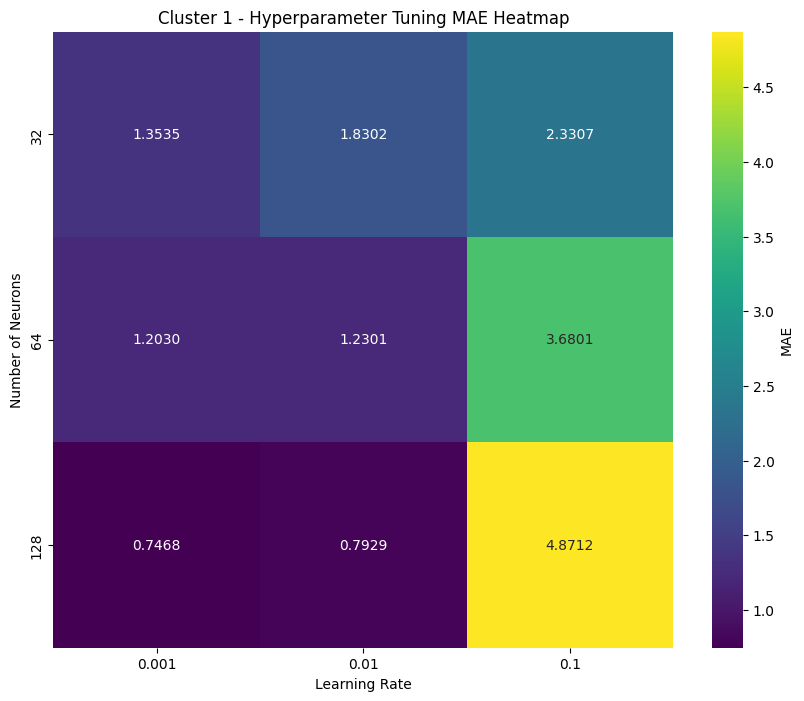

In [ ]:
# Perform tuning for all clusters
for cluster_id in eda_data['Cluster'].unique():
    print(f"Starting hyperparameter tuning for Cluster {cluster_id}")

    # Prepare data for the current cluster
    cluster_data = eda_data[eda_data['Cluster'] == cluster_id]
    X = cluster_data[features]
    y = cluster_data[target_variable]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize a DataFrame to store results
    results = []

    # Perform grid search for the current cluster
    for lr in param_grid['learning_rate']:
        for batch_size in param_grid['batch_size']:
            for neurons in param_grid['neurons']:
                for dropout_rate in param_grid['dropout_rate']:
                    print(f"Testing: LR={lr}, Batch={batch_size}, Neurons={neurons}, Dropout={dropout_rate}")

                    # Build and train the model
                    model = build_model(X_train.shape[1], lr, neurons, dropout_rate)
                    history = model.fit(
                        X_train, y_train,
                        validation_split=0.2,
                        epochs=50,
                        batch_size=batch_size,
                        verbose=0
                    )

                    # Evaluate the model
                    loss, mae = model.evaluate(X_test, y_test, verbose=0)
                    print(f"MAE: {mae:.4f}")

                    # Store results
                    results.append({
                        'learning_rate': lr,
                        'batch_size': batch_size,
                        'neurons': neurons,
                        'dropout_rate': dropout_rate,
                        'mae': mae
                    })

    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)
    results_file = f'hyperparameter_tuning_cluster_{cluster_id}.csv'
    results_df.to_csv(results_file, index=False)
    print(f"Hyperparameter tuning results saved to '{results_file}'.")

    # Visualize the results as a heatmap
    heatmap_data = results_df.pivot_table(
        index='neurons', columns='learning_rate', values='mae', aggfunc='mean'
    )
    plt.figure(figsize=(10, 8))
    sns.heatmap(heatmap_data, annot=True, fmt=".4f", cmap="viridis", cbar_kws={'label': 'MAE'})
    plt.title(f'Cluster {cluster_id} - Hyperparameter Tuning MAE Heatmap')
    plt.xlabel('Learning Rate')
    plt.ylabel('Number of Neurons')
    plt.show()


In [ ]:
def plot_validation_loss_heatmap(history):

    val_loss = history.history['val_loss']

    heatmap_data = np.array(val_loss).reshape(1, -1)

    # Plot the heatmap
    plt.figure(figsize=(10, 2))
    sns.heatmap(heatmap_data, annot=True, fmt=".4f", cmap="viridis", cbar_kws={'label': 'Validation Loss'})
    plt.title('Validation Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Validation Loss')
    plt.xticks(ticks=np.arange(len(val_loss)) + 0.5, labels=np.arange(1, len(val_loss) + 1), rotation=90)
    plt.yticks([], [])
    plt.show()

plot_validation_loss_heatmap(global_history)


Testing: LR=0.001, Batch=16, Neurons=32, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0199
Testing: LR=0.001, Batch=16, Neurons=32, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0738
Testing: LR=0.001, Batch=16, Neurons=32, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0711
Testing: LR=0.001, Batch=16, Neurons=64, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0270
Testing: LR=0.001, Batch=16, Neurons=64, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0402
Testing: LR=0.001, Batch=16, Neurons=64, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0519
Testing: LR=0.001, Batch=16, Neurons=128, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0464
Testing: LR=0.001, Batch=16, Neurons=128, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0202
Testing: LR=0.001, Batch=16, Neurons=128, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0498
Testing: LR=0.001, Batch=32, Neurons=32, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0277
Testing: LR=0.001, Batch=32, Neurons=32, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0353
Testing: LR=0.001, Batch=32, Neurons=32, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0521
Testing: LR=0.001, Batch=32, Neurons=64, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0313
Testing: LR=0.001, Batch=32, Neurons=64, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0325
Testing: LR=0.001, Batch=32, Neurons=64, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0474
Testing: LR=0.001, Batch=32, Neurons=128, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0215
Testing: LR=0.001, Batch=32, Neurons=128, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0248
Testing: LR=0.001, Batch=32, Neurons=128, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0512
Testing: LR=0.001, Batch=64, Neurons=32, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0364
Testing: LR=0.001, Batch=64, Neurons=32, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0473
Testing: LR=0.001, Batch=64, Neurons=32, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0609
Testing: LR=0.001, Batch=64, Neurons=64, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0293
Testing: LR=0.001, Batch=64, Neurons=64, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0372
Testing: LR=0.001, Batch=64, Neurons=64, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0587
Testing: LR=0.001, Batch=64, Neurons=128, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0178
Testing: LR=0.001, Batch=64, Neurons=128, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0223
Testing: LR=0.001, Batch=64, Neurons=128, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0616
Testing: LR=0.01, Batch=16, Neurons=32, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1699
Testing: LR=0.01, Batch=16, Neurons=32, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.2791
Testing: LR=0.01, Batch=16, Neurons=32, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0618
Testing: LR=0.01, Batch=16, Neurons=64, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.2893
Testing: LR=0.01, Batch=16, Neurons=64, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.2027
Testing: LR=0.01, Batch=16, Neurons=64, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.2638
Testing: LR=0.01, Batch=16, Neurons=128, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0356
Testing: LR=0.01, Batch=16, Neurons=128, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0590
Testing: LR=0.01, Batch=16, Neurons=128, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0840
Testing: LR=0.01, Batch=32, Neurons=32, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1262
Testing: LR=0.01, Batch=32, Neurons=32, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0854
Testing: LR=0.01, Batch=32, Neurons=32, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.5486
Testing: LR=0.01, Batch=32, Neurons=64, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1401
Testing: LR=0.01, Batch=32, Neurons=64, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.2601
Testing: LR=0.01, Batch=32, Neurons=64, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.3860
Testing: LR=0.01, Batch=32, Neurons=128, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0462
Testing: LR=0.01, Batch=32, Neurons=128, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0836
Testing: LR=0.01, Batch=32, Neurons=128, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.3611
Testing: LR=0.01, Batch=64, Neurons=32, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0660
Testing: LR=0.01, Batch=64, Neurons=32, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0954
Testing: LR=0.01, Batch=64, Neurons=32, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1917
Testing: LR=0.01, Batch=64, Neurons=64, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0720
Testing: LR=0.01, Batch=64, Neurons=64, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0544
Testing: LR=0.01, Batch=64, Neurons=64, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.2918
Testing: LR=0.01, Batch=64, Neurons=128, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1128
Testing: LR=0.01, Batch=64, Neurons=128, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.2184
Testing: LR=0.01, Batch=64, Neurons=128, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.2034
Testing: LR=0.1, Batch=16, Neurons=32, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1956
Testing: LR=0.1, Batch=16, Neurons=32, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.2413
Testing: LR=0.1, Batch=16, Neurons=32, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.2985
Testing: LR=0.1, Batch=16, Neurons=64, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.5017
Testing: LR=0.1, Batch=16, Neurons=64, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.2125
Testing: LR=0.1, Batch=16, Neurons=64, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.2020
Testing: LR=0.1, Batch=16, Neurons=128, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.3386
Testing: LR=0.1, Batch=16, Neurons=128, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.2655
Testing: LR=0.1, Batch=16, Neurons=128, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1935
Testing: LR=0.1, Batch=32, Neurons=32, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.2441
Testing: LR=0.1, Batch=32, Neurons=32, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 1.0370
Testing: LR=0.1, Batch=32, Neurons=32, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1455
Testing: LR=0.1, Batch=32, Neurons=64, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1258
Testing: LR=0.1, Batch=32, Neurons=64, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 1.1822
Testing: LR=0.1, Batch=32, Neurons=64, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1375
Testing: LR=0.1, Batch=32, Neurons=128, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.2740
Testing: LR=0.1, Batch=32, Neurons=128, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.6409
Testing: LR=0.1, Batch=32, Neurons=128, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.3243
Testing: LR=0.1, Batch=64, Neurons=32, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.2237
Testing: LR=0.1, Batch=64, Neurons=32, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.2770
Testing: LR=0.1, Batch=64, Neurons=32, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.2289
Testing: LR=0.1, Batch=64, Neurons=64, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.2344
Testing: LR=0.1, Batch=64, Neurons=64, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.1816
Testing: LR=0.1, Batch=64, Neurons=64, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.2469
Testing: LR=0.1, Batch=64, Neurons=128, Dropout=0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.2028
Testing: LR=0.1, Batch=64, Neurons=128, Dropout=0.3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.0837
Testing: LR=0.1, Batch=64, Neurons=128, Dropout=0.5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MAE: 0.2488
Global hyperparameter tuning results saved to 'hyperparameter_tuning_global.csv'.


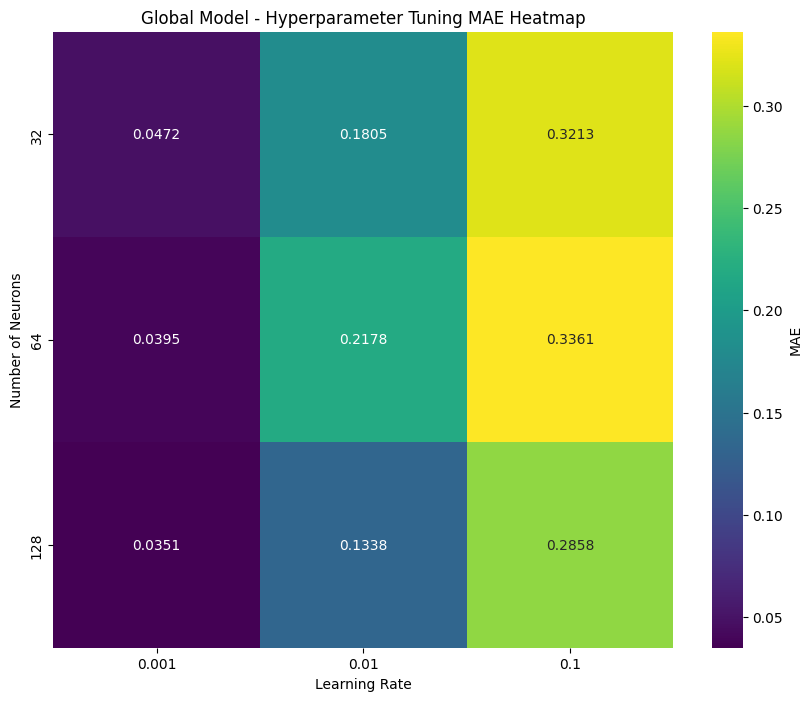

In [ ]:
# Prepare global dataset
X_global = eda_data[features]
y_global = eda_data[target_variable]
X_train_global, X_test_global, y_train_global, y_test_global = train_test_split(
    X_global, y_global, test_size=0.2, random_state=42
)

# Initialize a DataFrame to store results for the global model
global_results = []

# Perform grid search for the global dataset
for lr in param_grid['learning_rate']:
    for batch_size in param_grid['batch_size']:
        for neurons in param_grid['neurons']:
            for dropout_rate in param_grid['dropout_rate']:
                print(f"Testing: LR={lr}, Batch={batch_size}, Neurons={neurons}, Dropout={dropout_rate}")

                # Build and train the model
                model = build_model(X_train_global.shape[1], lr, neurons, dropout_rate)
                history = model.fit(
                    X_train_global, y_train_global,
                    validation_split=0.2,
                    epochs=50,
                    batch_size=batch_size,
                    verbose=0
                )

                # Evaluate the model
                loss, mae = model.evaluate(X_test_global, y_test_global, verbose=0)
                print(f"MAE: {mae:.4f}")

                # Store results
                global_results.append({
                    'learning_rate': lr,
                    'batch_size': batch_size,
                    'neurons': neurons,
                    'dropout_rate': dropout_rate,
                    'mae': mae
                })

# Convert results to a DataFrame
global_results_df = pd.DataFrame(global_results)
global_results_file = 'hyperparameter_tuning_global.csv'
global_results_df.to_csv(global_results_file, index=False)
print(f"Global hyperparameter tuning results saved to '{global_results_file}'.")

# Visualize the global results as a heatmap
heatmap_data_global = global_results_df.pivot_table(
    index='neurons', columns='learning_rate', values='mae', aggfunc='mean'
)
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data_global, annot=True, fmt=".4f", cmap="viridis", cbar_kws={'label': 'MAE'})
plt.title('Global Model - Hyperparameter Tuning MAE Heatmap')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Neurons')
plt.show()

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot a heatmap of validation loss
def plot_validation_loss_heatmap(history):
    # Extract validation loss
    val_loss = history.history['val_loss']

    # Reshape into a 2D array for heatmap visualization
    # Assuming epochs are along the columns
    heatmap_data = np.array(val_loss).reshape(1, -1)

    # Plot the heatmap
    plt.figure(figsize=(10, 2))
    sns.heatmap(heatmap_data, annot=True, fmt=".4f", cmap="viridis", cbar_kws={'label': 'Validation Loss'})
    plt.title('Validation Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Validation Loss')
    plt.xticks(ticks=np.arange(len(val_loss)) + 0.5, labels=np.arange(1, len(val_loss) + 1), rotation=90)
    plt.yticks([], [])
    plt.show()

# Call the function with the global history object
plot_validation_loss_heatmap(global_history)

